In [1]:
import deimos
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
import sys
sys.path.append("D:/metabolome_inference/metabolome_inference/src/")
from PeakDetective import rawData,PeakDetective,Classifier,Smoother,normalizeMatrix,safeNormalize
import detection_helper
import scipy.stats as stats
import seaborn as sb
from matplotlib.colors import LinearSegmentedColormap


In [2]:
datadir = "../data/mzMLs/"
resolution = 60


In [4]:
ms1ppm = 10
peakWidth = (15,83)
s2n = 2
noise = 10
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
det.to_skyline(datadir+"xcms_peak_list_transition_list.csv","Negative",moleculeListName = "XCMS peaks")
peakList = pd.DataFrame(det.peakList)
peakList["rt"] = .5 * peakList["rt_start"] + .5 * peakList["rt_end"]
peakList = peakList[["mz","rt"]]
peakList

mz        rt
1      68.995954  0.747711
2      68.996105  0.948315
3      71.014253  0.987190
4      71.014120  7.742168
5      71.014144  5.914447
...          ...       ...
5413  868.350668  4.716790
5414  872.116647  6.591149
5415  873.119962  6.599864
5416  878.820516  8.866325
5417  885.120741  8.305859

[5417 rows x 2 columns]

In [5]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
print(files)
raw_data = []
for file in files:
    temp = rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data.append(temp)
    

['M3T-Std_neg_DDA_1mz.mzML', 'M3T-Std_neg_DDA_3mz.mzML', 'M3T-Std_neg_DDA_5mz.mzML']


In [6]:
Smoother(resolution).summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 60, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 58, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 56, 16)            1552      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 54, 8)             392       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 52, 4)             100       
_________________________________________________________________
flatten (Flatten)            (None, 208)               0     

In [7]:
Classifier(resolution).summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 60, 1)        0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 29, 8)        32          reshape_2[0][0]                  
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 14, 4)        100         conv1d_4[0][0]                   
______________________________________________________________________________________

generated EICs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done
fitting smoother...
Epoch 1/20
229/229 [==============================] - 7s 25ms/step - loss: 0.5429 - mean_absolute_error: 0.3856 - val_loss: 0.1104 - val_mean_absolute_error: 0.0413
Epoch 2/20
229/229 [==============================] - 5s 21ms/step - loss: 0.1086 - mean_absolute_error: 0.0350 - val_loss: 0.0918 - val_mean_absolute_error: 0.0272
Epoch 3/20
229/229 [==============================] - 5s 21ms/step - loss: 0.0946 - mean_absolute_error: 0.0232 - val_loss: 0.0812 - val_mean_absolute_error: 0.0184
Epoch 4/20
229/229 [==============================] - 5s 21ms/step - loss: 0.0852 - mean_absolute_error: 0.0149 - val_loss: 0.0743 - val_mean_absolute_error: 0.0117
Epoch 5/20
229/229 [==============================] - 5s 21ms/step - loss: 0.0800 - mean_absolute_error: 0.0096 - val_loss: 0.0719 - val_mean_absolute_error: 0.0093
Epoch 6/20
229/229 [==============================] - 5s

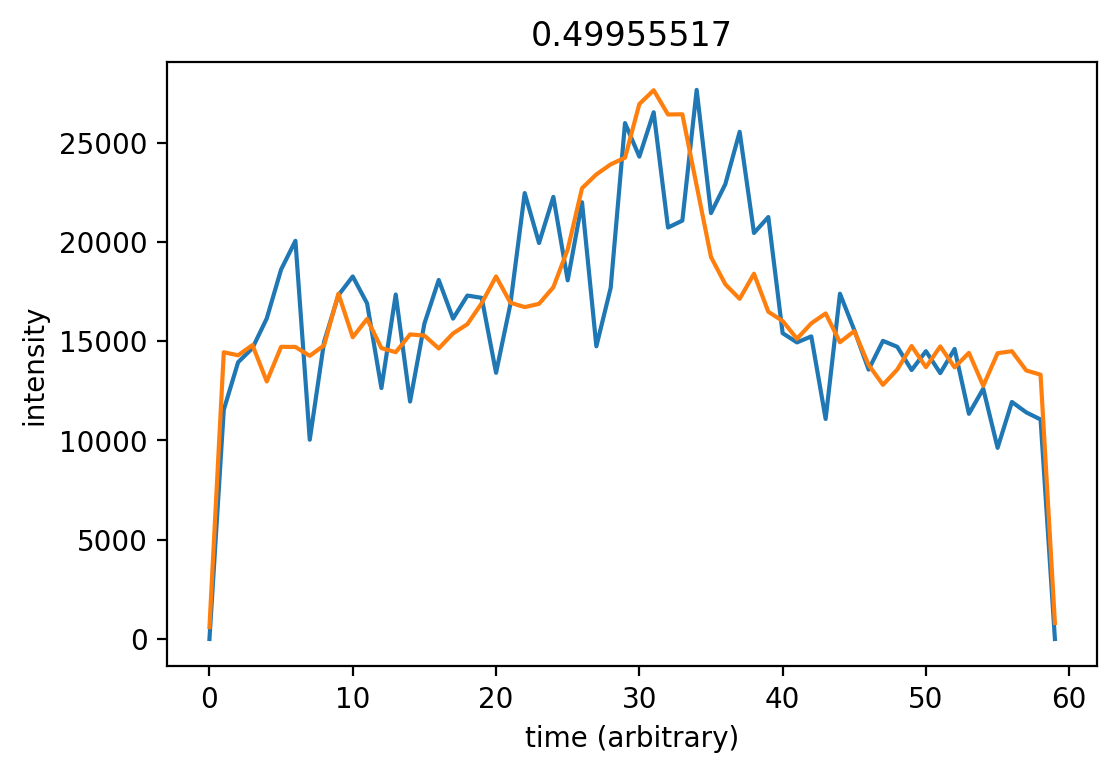

Enter classification (1=True Peak, 0=Artifact): 
0


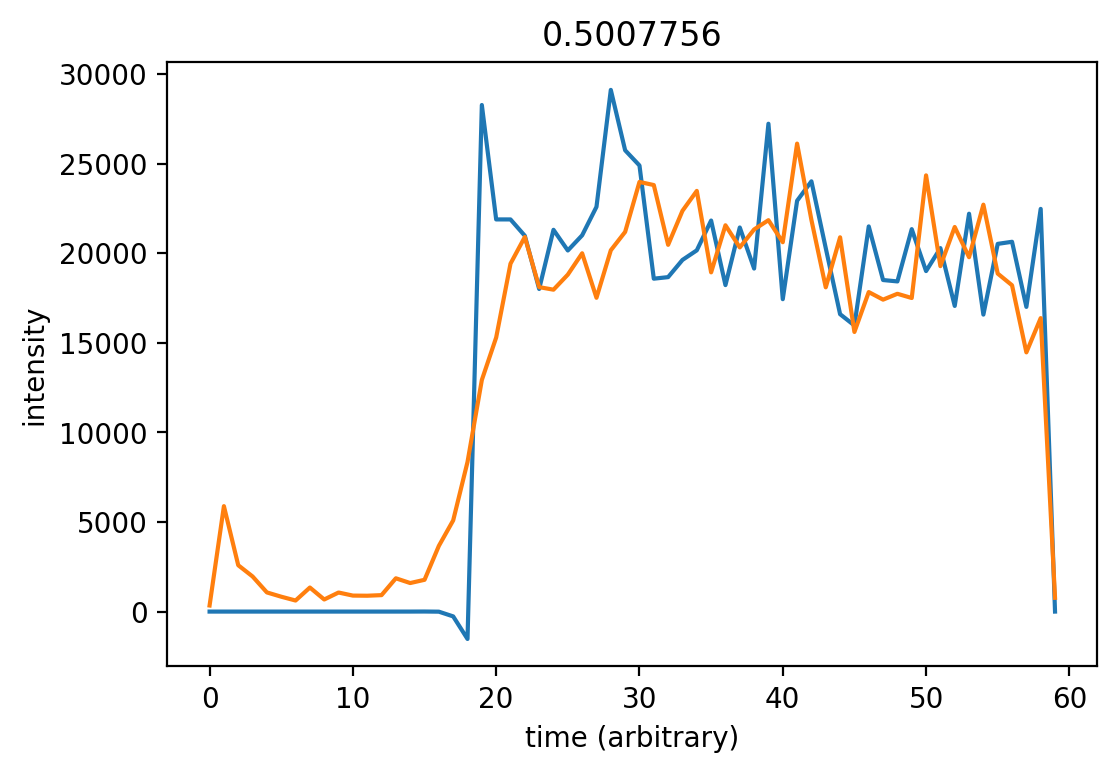

Enter classification (1=True Peak, 0=Artifact): 
0


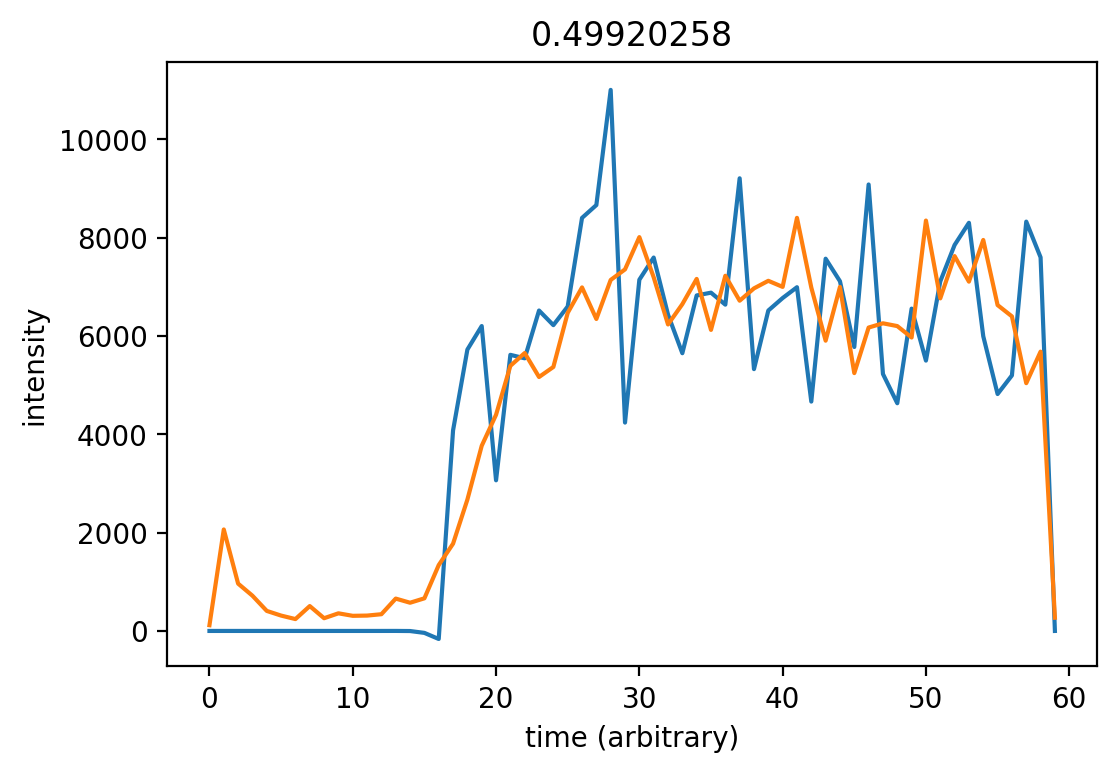

Enter classification (1=True Peak, 0=Artifact): 
0
round 2: 2078 unclassified features


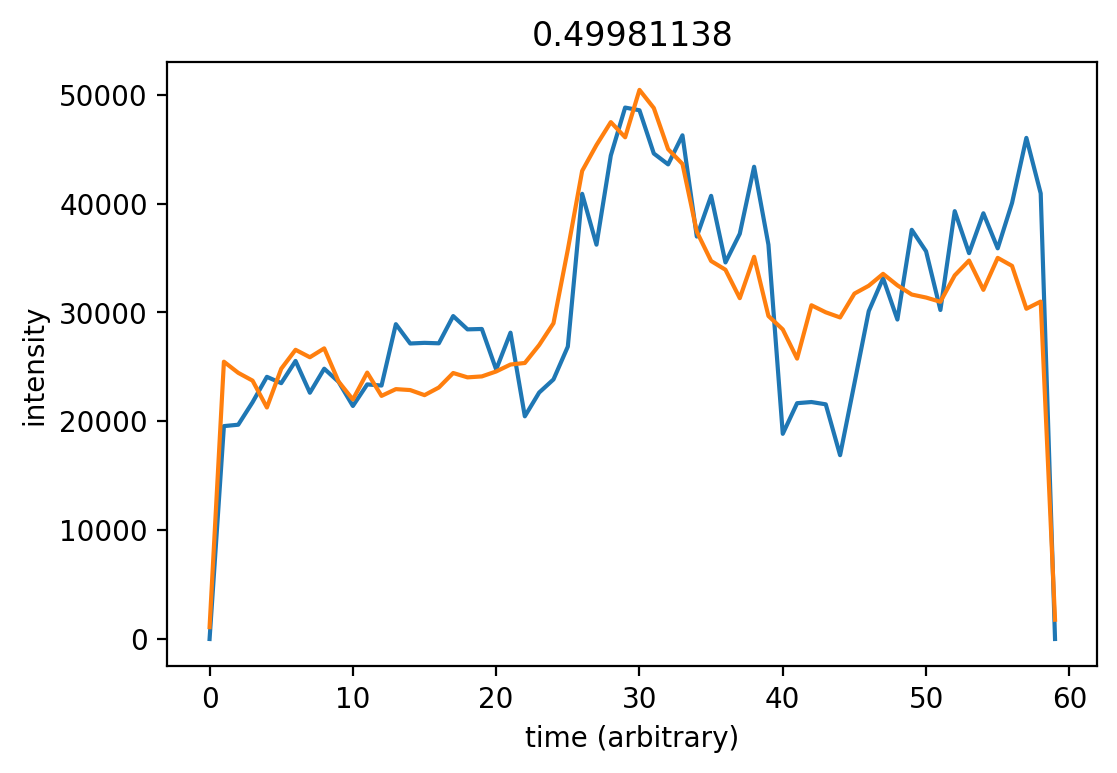

Enter classification (1=True Peak, 0=Artifact): 
1


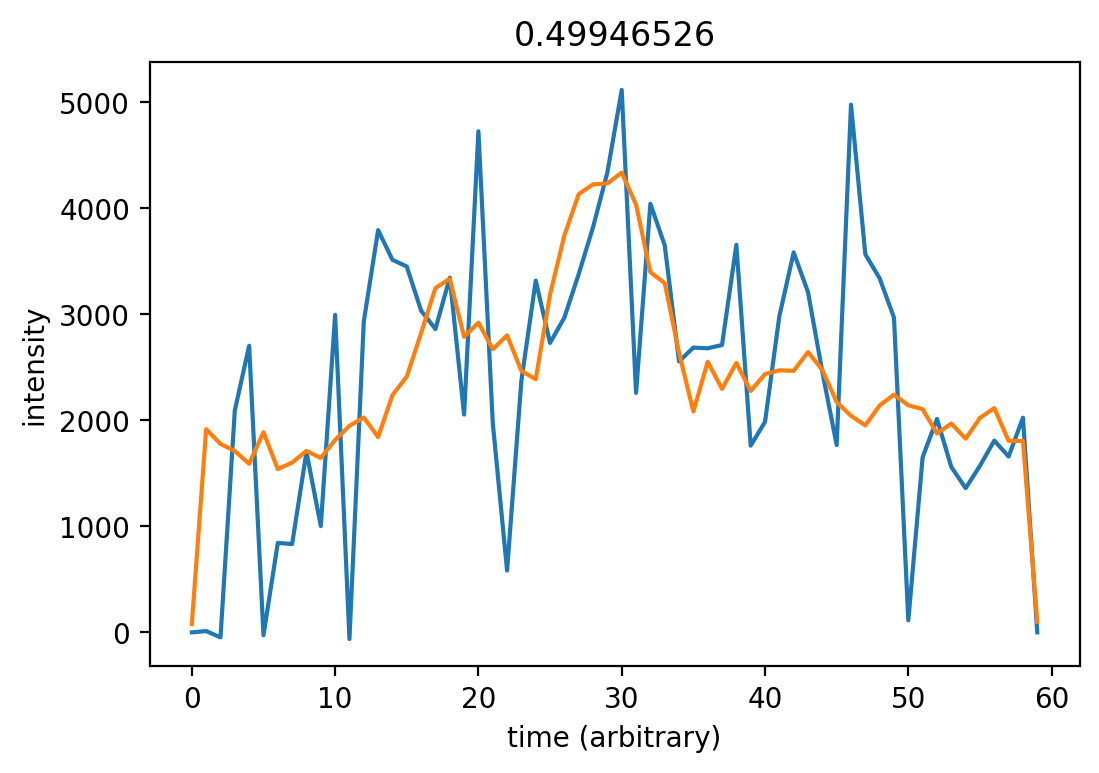

Enter classification (1=True Peak, 0=Artifact): 
0


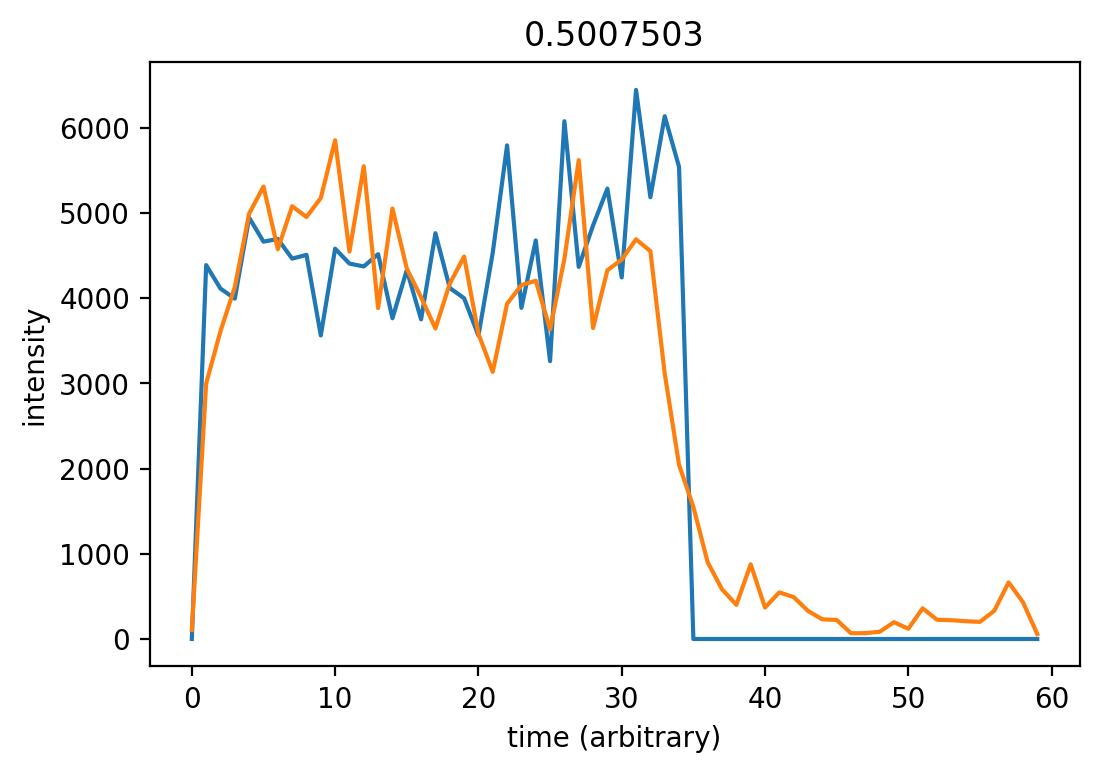

Enter classification (1=True Peak, 0=Artifact): 
0
round 3: 1444 unclassified features


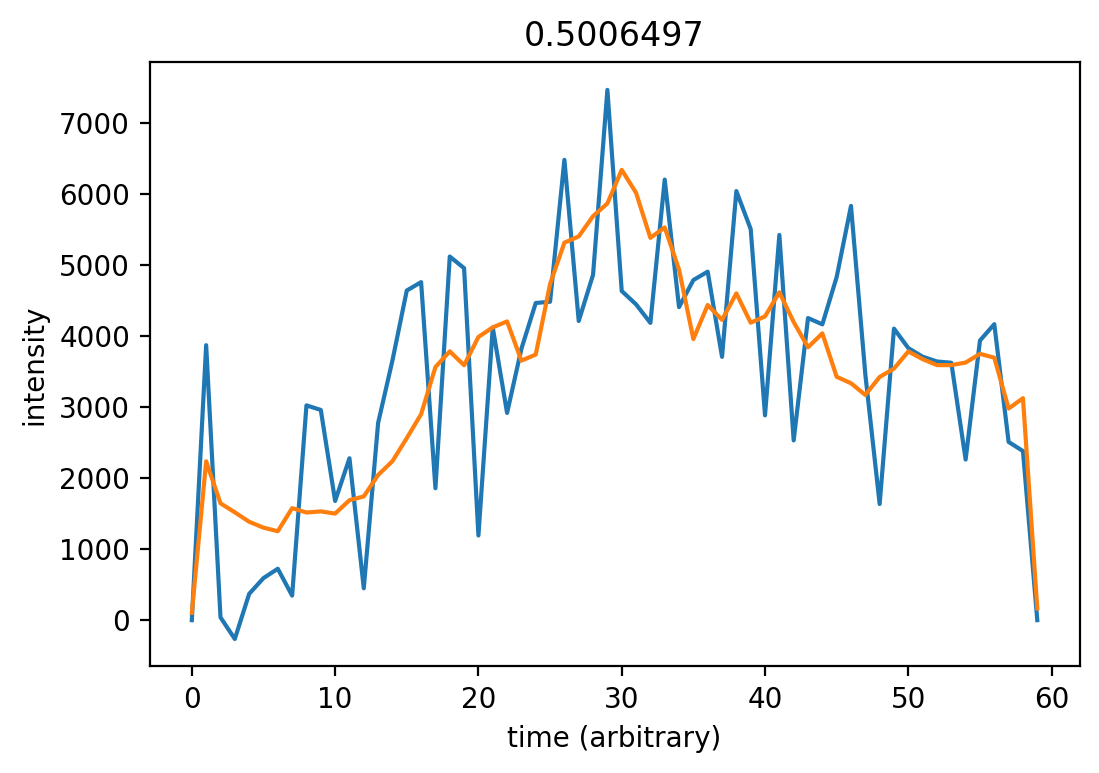

Enter classification (1=True Peak, 0=Artifact): 
0


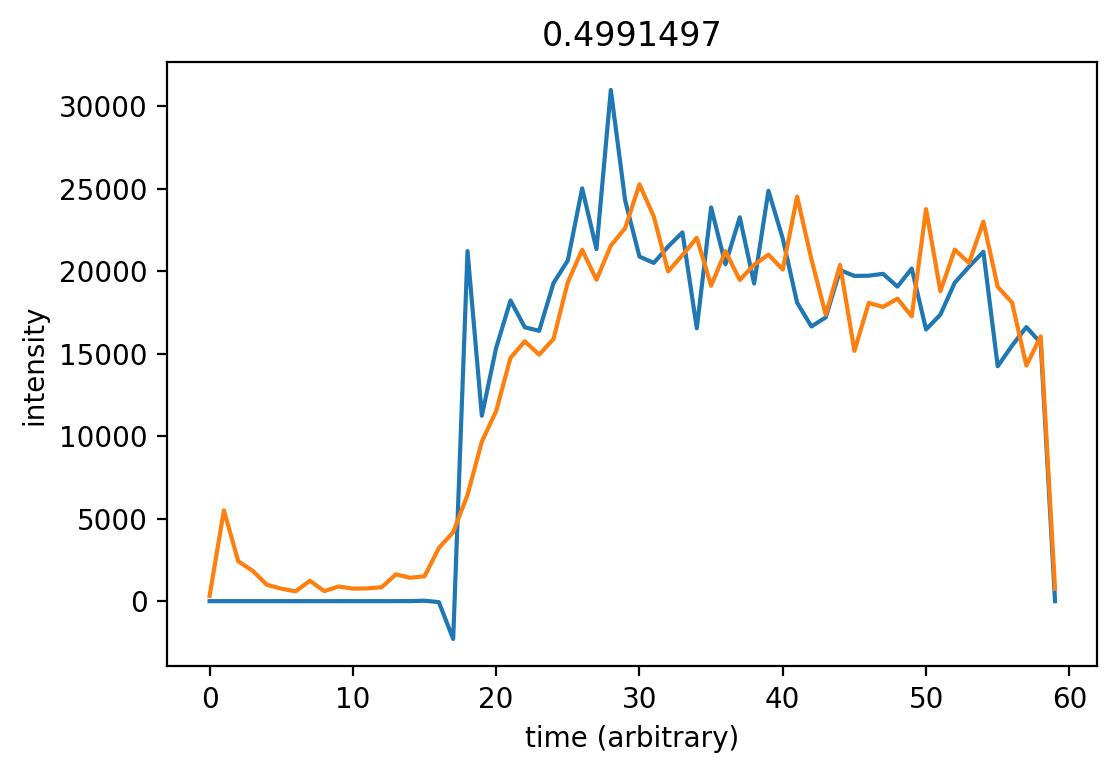

Enter classification (1=True Peak, 0=Artifact): 
0


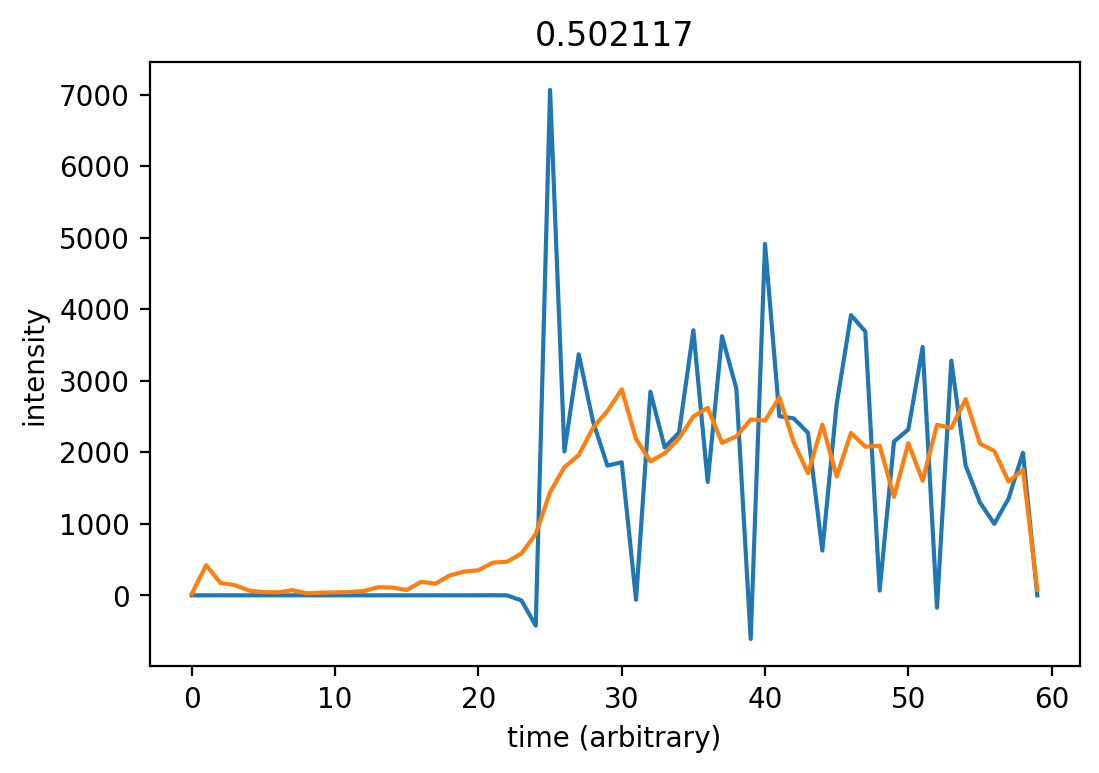

Enter classification (1=True Peak, 0=Artifact): 
0
round 4: 1252 unclassified features


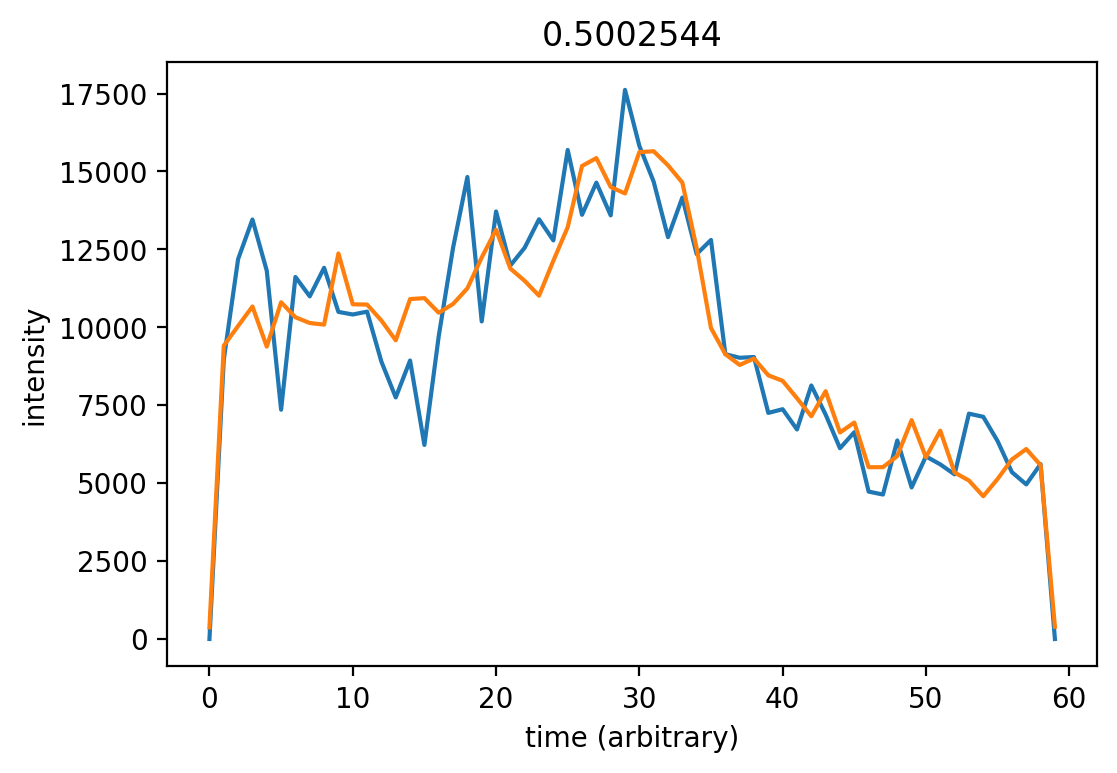

Enter classification (1=True Peak, 0=Artifact): 
0


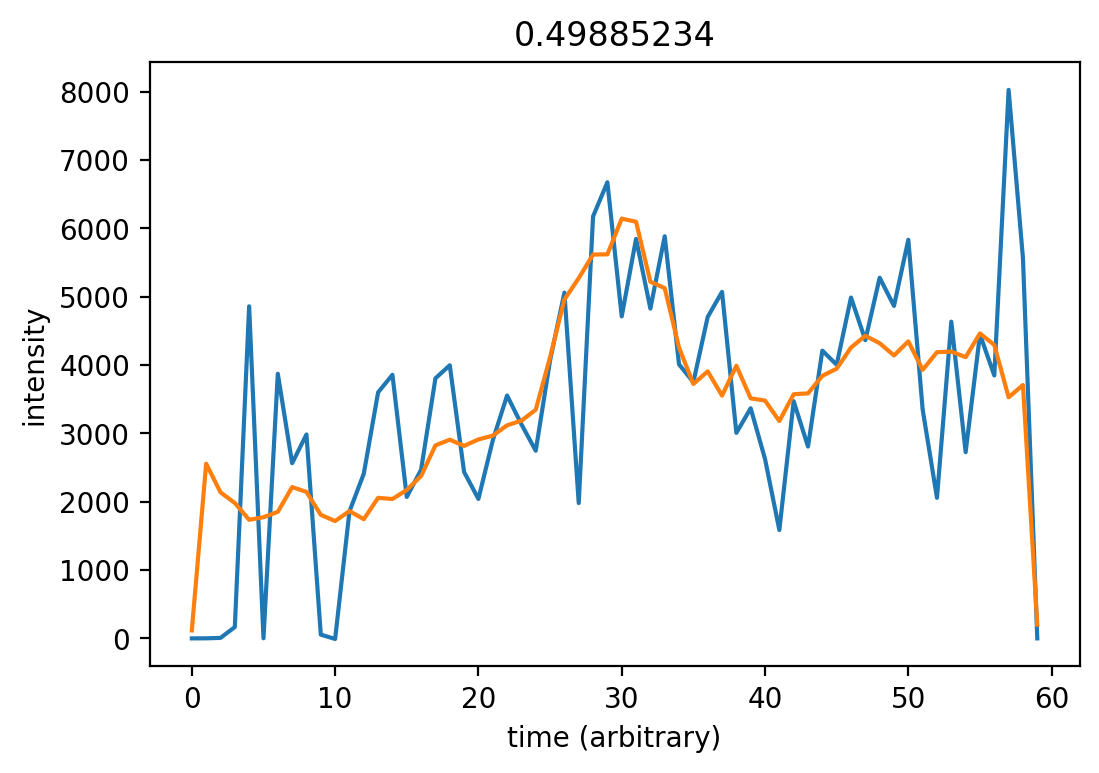

Enter classification (1=True Peak, 0=Artifact): 
0


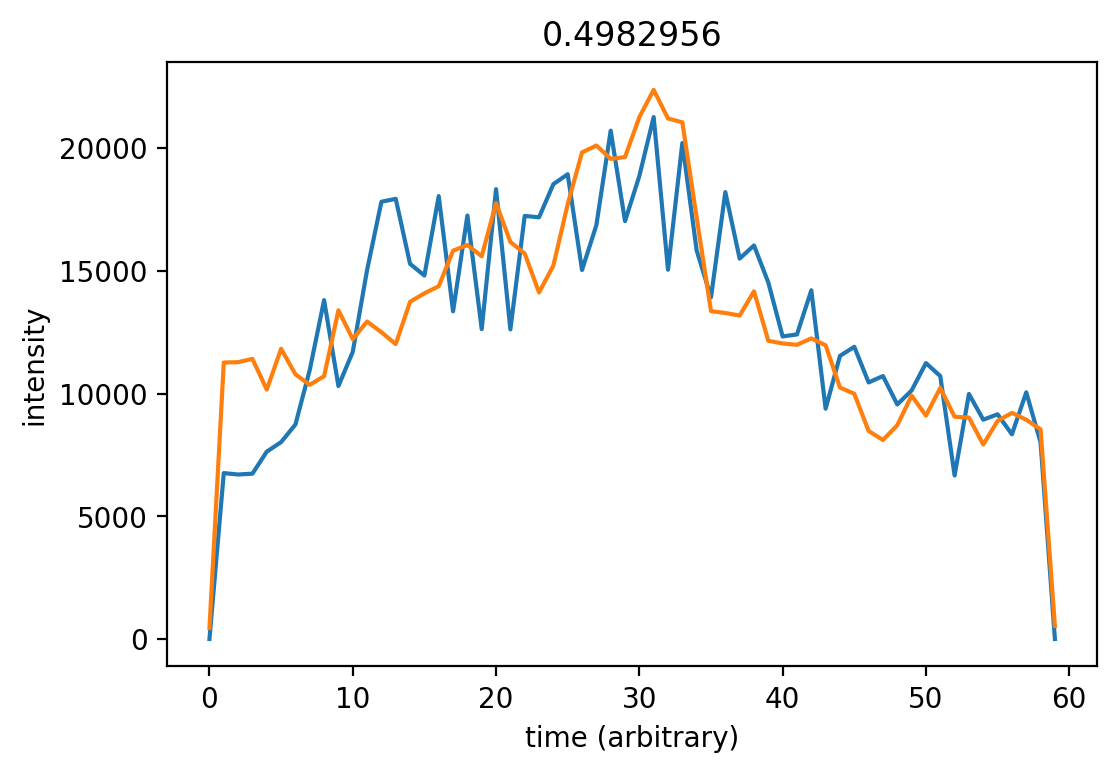

Enter classification (1=True Peak, 0=Artifact): 
0
round 5: 1226 unclassified features


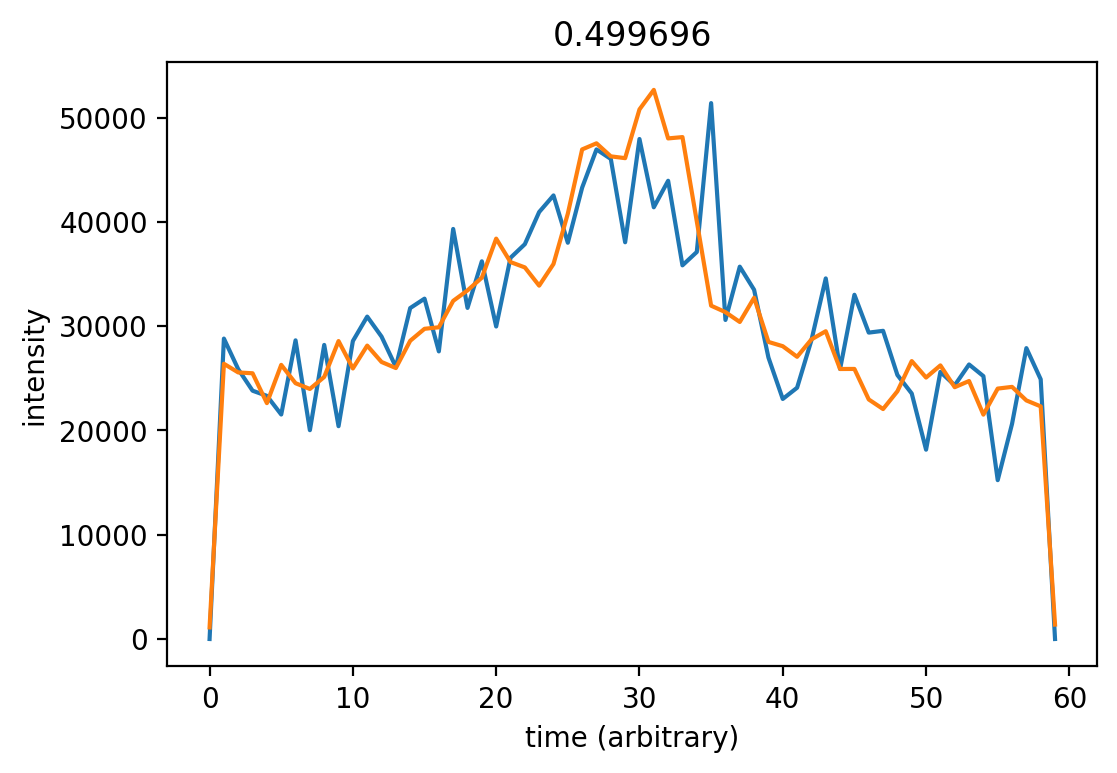

Enter classification (1=True Peak, 0=Artifact): 
0


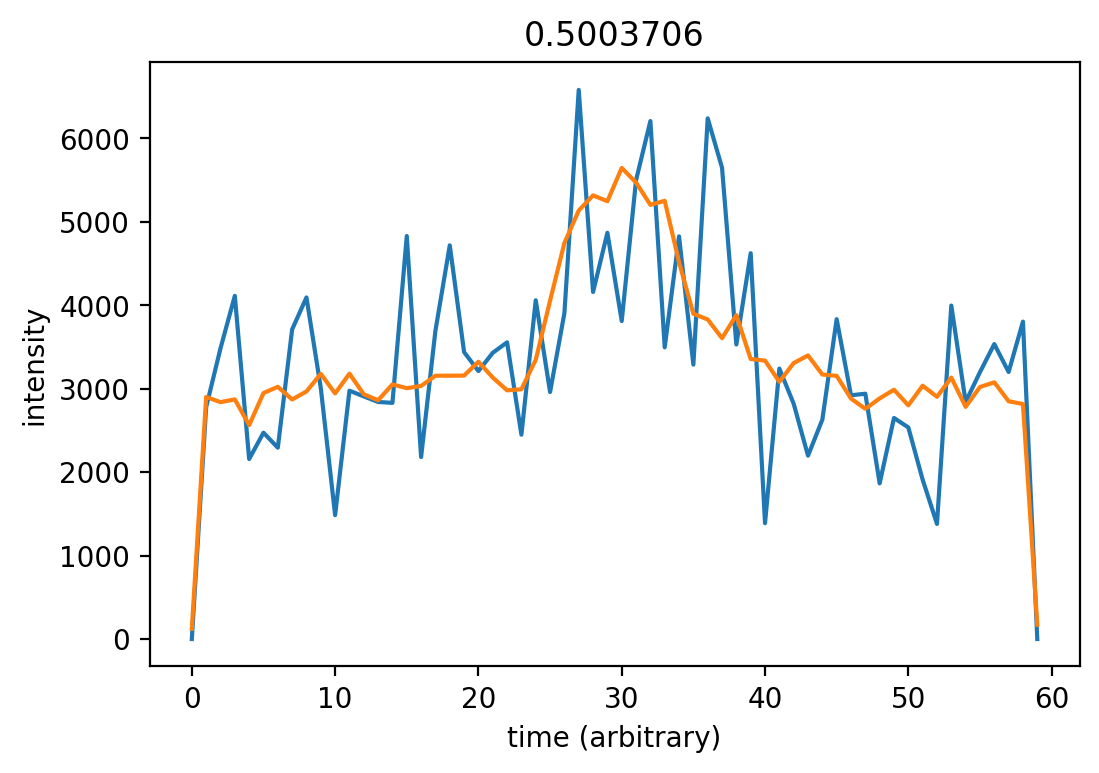

Enter classification (1=True Peak, 0=Artifact): 
0


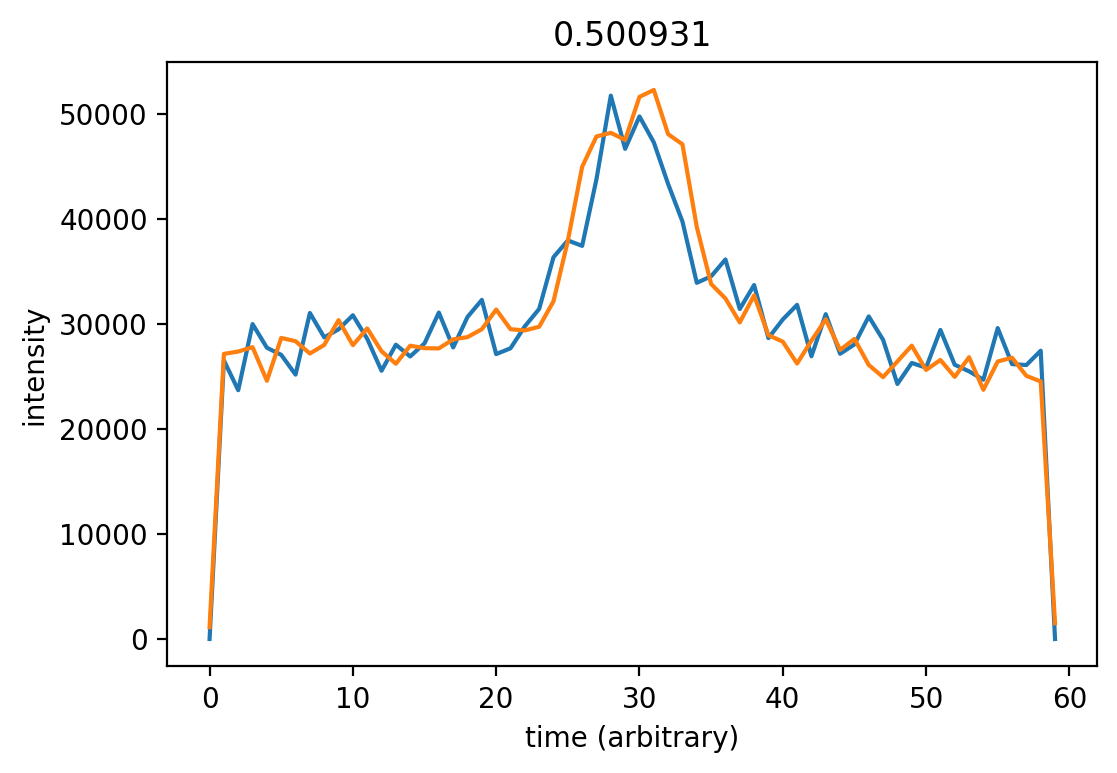

Enter classification (1=True Peak, 0=Artifact): 
1
done
training classifier...
Epoch 1/10
686/686 [==============================] - 3s 3ms/step - loss: 0.7192 - mean_absolute_error: 0.4974 - val_loss: 0.6953 - val_mean_absolute_error: 0.4953
Epoch 2/10
686/686 [==============================] - 2s 3ms/step - loss: 0.4786 - mean_absolute_error: 0.2787 - val_loss: 0.3822 - val_mean_absolute_error: 0.2003
Epoch 3/10
686/686 [==============================] - 2s 3ms/step - loss: 0.2131 - mean_absolute_error: 0.0904 - val_loss: 0.2407 - val_mean_absolute_error: 0.1163
Epoch 4/10
686/686 [==============================] - 2s 3ms/step - loss: 0.1429 - mean_absolute_error: 0.0594 - val_loss: 0.1850 - val_mean_absolute_error: 0.0821
Epoch 5/10
686/686 [==============================] - 2s 3ms/step - loss: 0.1174 - mean_absolute_error: 0.0482 - val_loss: 0.1724 - val_mean_absolute_error: 0.0713
Epoch 6/10
686/686 [==============================] - 2s 3ms/step - loss: 0.1067 - mean_absolute_erro

In [7]:
#format X
if __name__ == "__main__":
    integ = PeakDetective(numCores = 20,resolution=resolution)
    ms1_peaks_curated,X_norm,X_orig,tics,scores,progress = integ.curatePeaks(raw_data,peakList,min_peaks=10000,shift=2.0,smooth_epochs=20)

In [8]:
ms1_peaks_curated

{'../data/mzMLs/M3T-Std_neg_DDA_1mz.mzML':               mz        rt
 1      68.995954  0.747711
 3      71.014253  0.987190
 4      71.014120  7.742168
 6      71.014267  6.291299
 7      71.014076  5.395081
 ...          ...       ...
 5413  868.350668  4.716790
 5414  872.116647  6.591149
 5415  873.119962  6.599864
 5416  878.820516  8.866325
 5417  885.120741  8.305859
 
 [2845 rows x 2 columns],
 '../data/mzMLs/M3T-Std_neg_DDA_3mz.mzML':               mz        rt
 3      71.014253  0.987190
 4      71.014120  7.742168
 6      71.014267  6.291299
 7      71.014076  5.395081
 8      71.014261  1.821318
 ...          ...       ...
 5413  868.350668  4.716790
 5414  872.116647  6.591149
 5415  873.119962  6.599864
 5416  878.820516  8.866325
 5417  885.120741  8.305859
 
 [2877 rows x 2 columns],
 '../data/mzMLs/M3T-Std_neg_DDA_5mz.mzML':               mz        rt
 1      68.995954  0.747711
 3      71.014253  0.987190
 4      71.014120  7.742168
 6      71.014267  6.291299
 7    

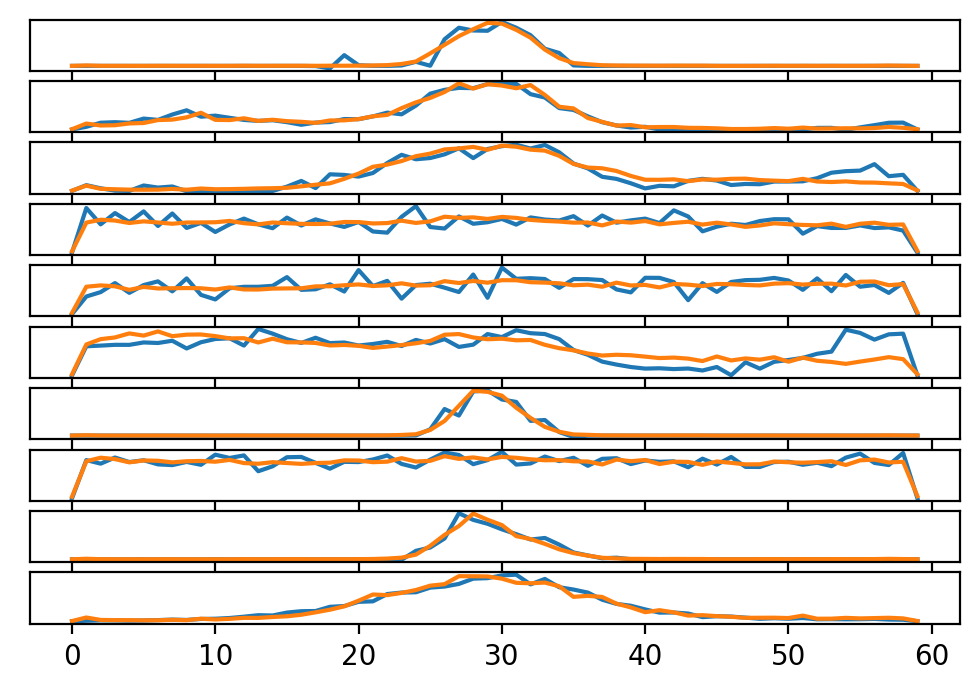

In [15]:
randomInts = rd.sample(list(range(len(X_norm))),k=10)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_orig[x],label="original")
    ax.plot(X_norm[x],label="output")
    ax.set_yticks([],[])
    #ax.legend()

[16251, 2078, 1444, 1252, 1226]


Text(0, 0.5, 'log10(# of uncertain peaks)')

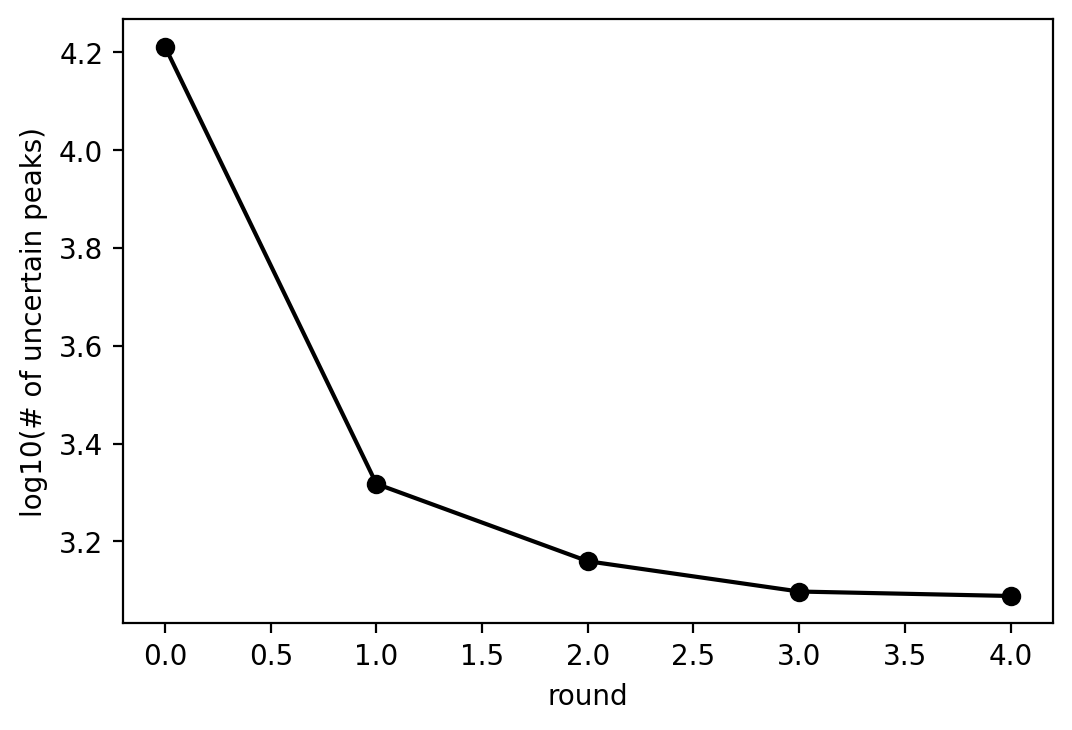

In [16]:
print(progress)
plt.plot(list(range(len(progress))),np.log10(progress),color="black")
plt.scatter(list(range(len(progress))),np.log10(progress),color="black")
plt.xlabel("round")
plt.ylabel("log10(# of uncertain peaks)")

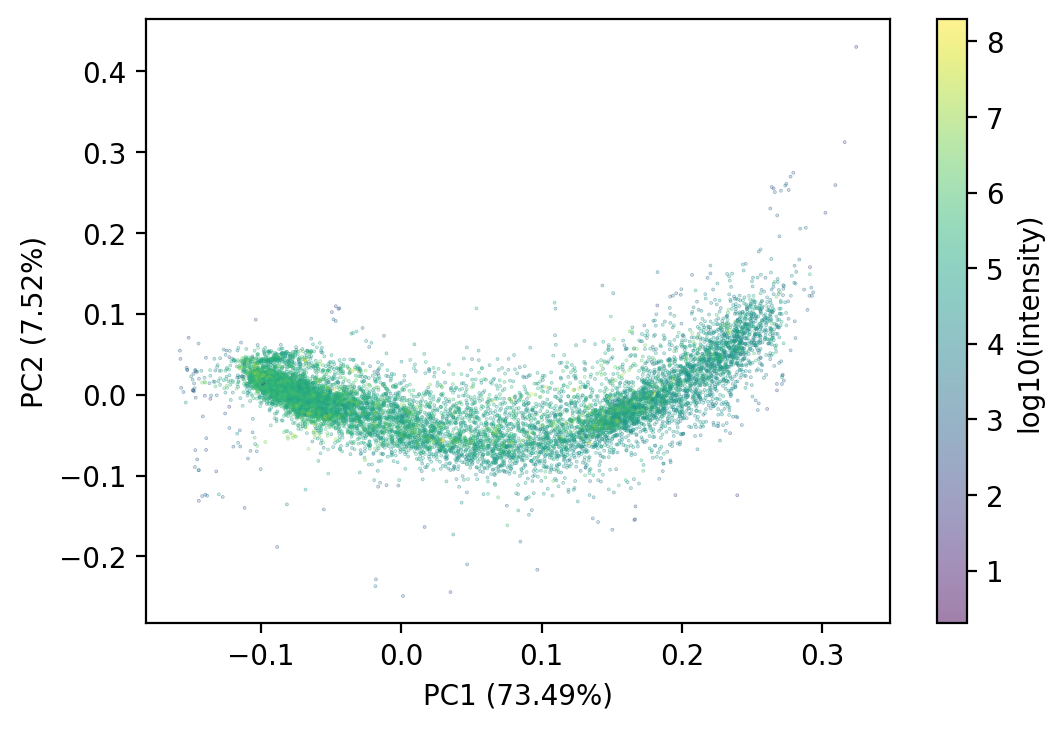

In [17]:
pca = PCA(2)
loads = pca.fit_transform(X_norm)
plt.scatter(loads[:,0],loads[:,1],c=tics,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log10(intensity)")

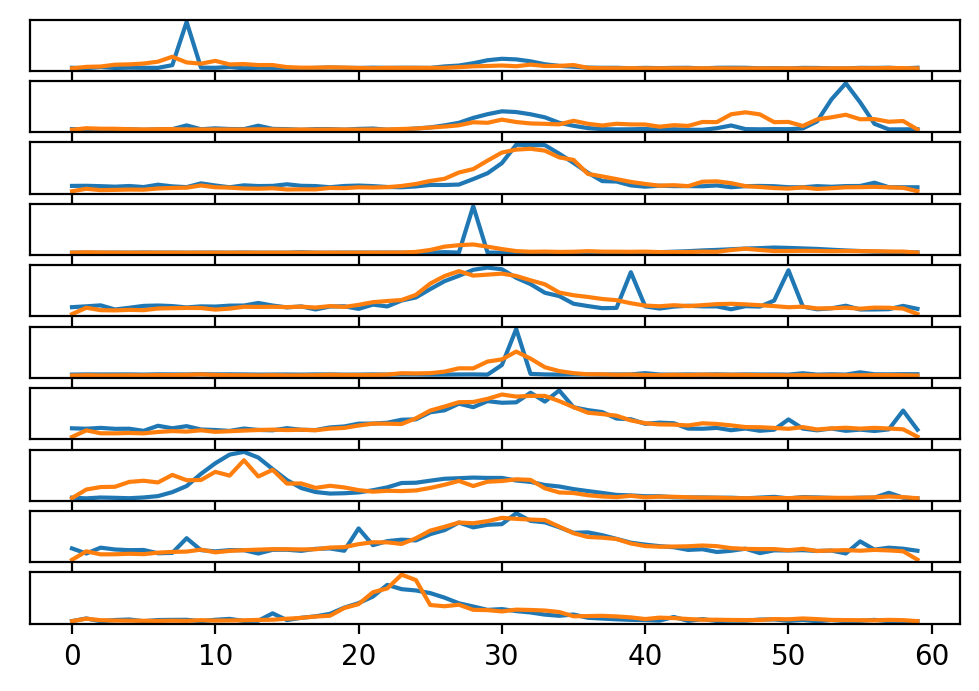

In [18]:
randomInts = rd.sample(list(range(len(X_norm))),k=10)
X_signal,_ = integ.generateSignalPeaks(X_norm,tics,[[0,.4],[.6,1.0]])
X_signal_smoothed = integ.smoother.predict(X_signal)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_signal[x],label="original")
    ax.plot(X_signal_smoothed[x],label="output")
    ax.set_yticks([],[])


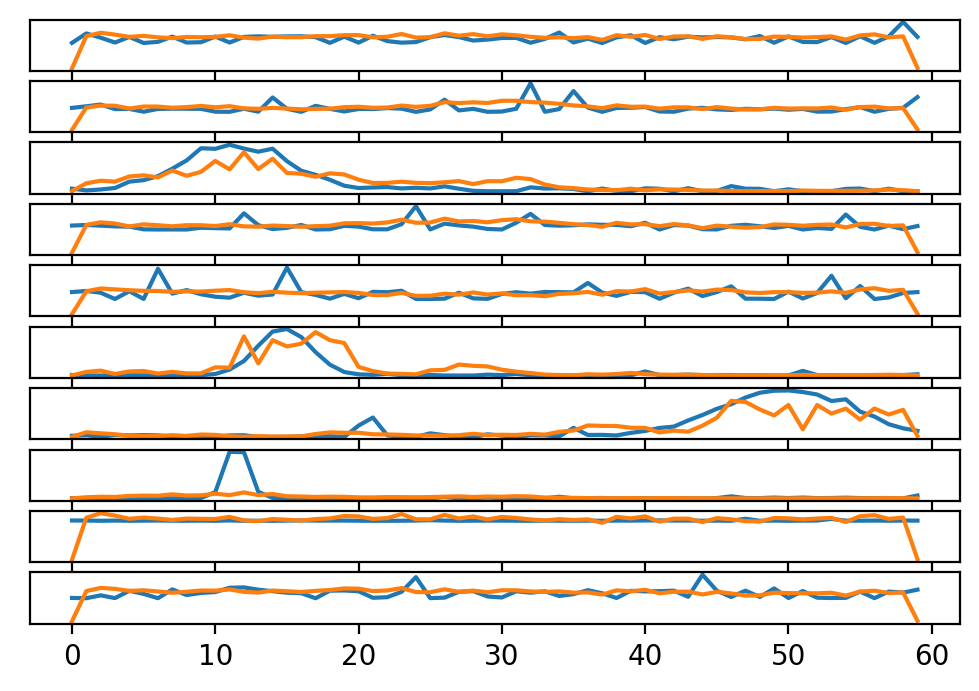

In [19]:
randomInts = rd.sample(list(range(len(X_norm))),k=10)
X_noise,_ = integ.generateFalsePeaks(X_norm,tics, [[0,.4],[.6,1.0]])
X_noise_smoothed = integ.smoother.predict(X_noise)

fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_noise[x],label="original")
    ax.plot(X_noise_smoothed[x],label="output")
    ax.set_yticks([],[])


[0.20005374 0.07961066]


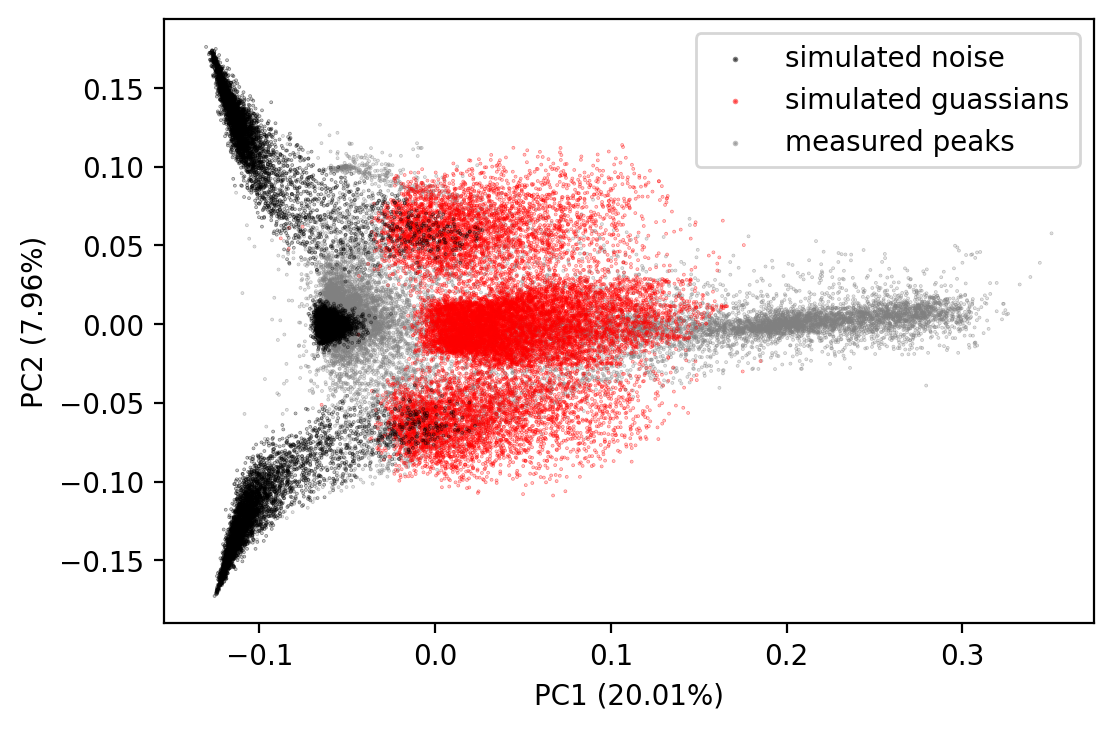

In [20]:
tmp = np.concatenate((X_norm,normalizeMatrix(X_signal),normalizeMatrix(X_noise)))
cs = ["grey" for _ in X_norm] + ["red" for _ in X_signal] + ["black" for _ in X_noise]
loads = pca.fit_transform(tmp)
print(pca.explained_variance_ratio_[:2])
def getColor(s):
    if s < 0.01:
        return "black"
    if s > 0.99:
        return "red"
    else:
        return "grey"
plt.scatter([0],[0],color="black",label="simulated noise",s=1,alpha=.5)
plt.scatter([0],[0],color="red",label="simulated guassians",s=1,alpha=.5)
plt.scatter([0],[0],color="grey",label="measured peaks",s=1,alpha=.5)

plt.scatter(loads[:,0],loads[:,1],s=.1,alpha=.5,c=cs)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.legend()

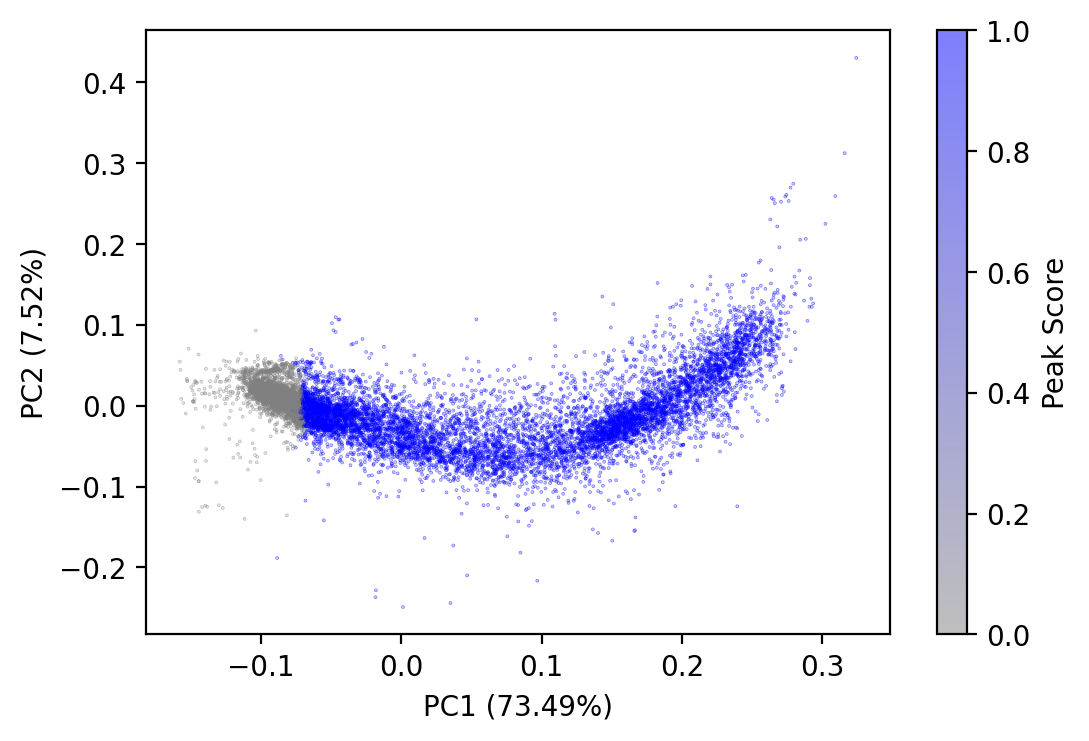

In [24]:
pca = PCA(2)
loads = pca.fit_transform(X_norm)
colormap = LinearSegmentedColormap.from_list("test",colors=["grey", "blue"],N=256)
plt.scatter(loads[:,0],loads[:,1],c=scores,s=.1,alpha=.5,cmap=colormap)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="Peak Score")

Text(0, 0.5, '% of features')

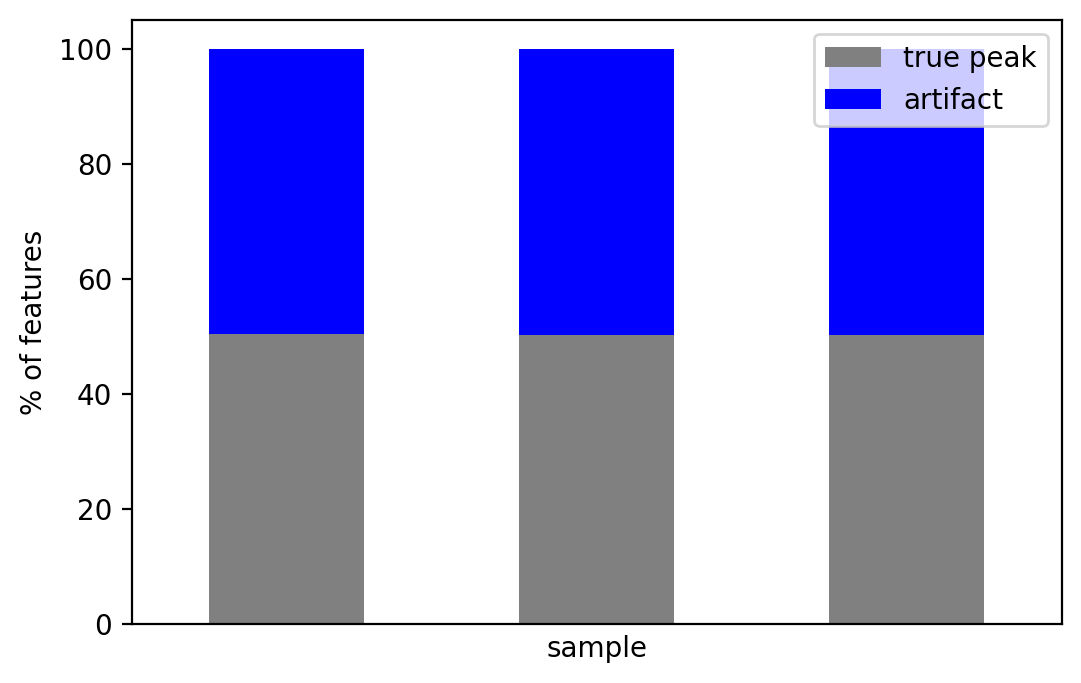

In [20]:
df = {}
for file in files:
    for index,row in peakList.iterrows():
        if index in ms1_peaks_curated[datadir + file].index.values:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

['M3T-Std_neg_DDA_1mz.mzML', 'M3T-Std_neg_DDA_3mz.mzML', 'M3T-Std_neg_DDA_5mz.mzML']


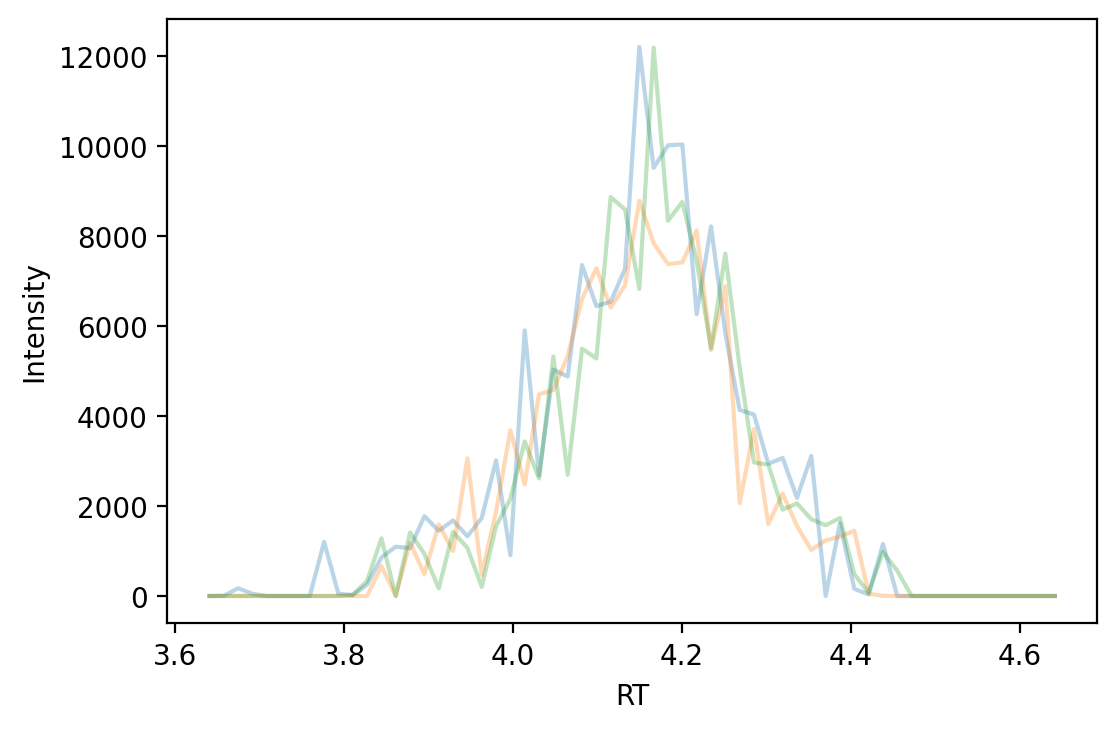

In [21]:
file = datadir + files[0]
print(files)
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC(raw_data,ms1_peaks_curated[file].at[i,"mz"],ms1_peaks_curated[file].at[i,"rt"]-.5,ms1_peaks_curated[file].at[i,"rt"]+.5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

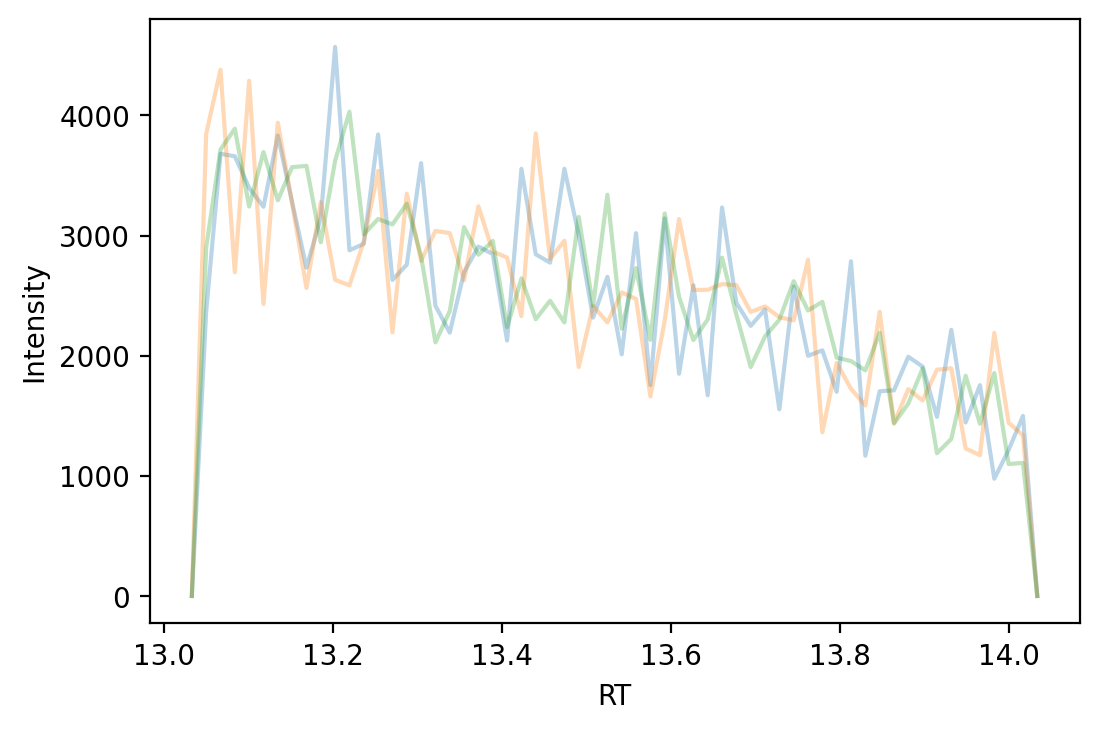

In [22]:
file = datadir + files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i not in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC(raw_data,peakList.at[i,"mz"],peakList.at[i,"rt"]-.5,peakList.at[i,"rt"] + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

In [23]:
real_peaks = pd.read_csv("../data/peaks_neg_m3t.csv")
real_peaks

Unnamed: 0                                     Name  rt_start  rt_end  \
0            0                Fructose 1,6-bisphosphate      8.97    9.57   
1            1                              Citric acid      8.88    9.22   
2            2                          Acetoacetyl-CoA      6.39    6.87   
3            3                               Acetyl-CoA      6.31    6.75   
4            4                          Chelidamic Acid      6.85    7.46   
..         ...                                      ...       ...     ...   
66          70                                   URACIL      1.90    2.46   
67          71                                  URIDINE      2.94    3.59   
68          72  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      7.20    7.56   
69          73                                   VALINE      4.78    5.30   
70          74                             OXOGLUTARATE      7.25    7.59   

           CAS                     InChiKey  pubchemID mzCloudID  \
0     488-69-7  RNBGYGVWRKECFJ-ZXXMMSQZSA-N     445557        -1   
1      77-92-9  KRKNYBCHXYNGOX-UHFFFAOYSA-N        311      r352   
2    1420-36-6  OJFDKHTZOUZBOS-CITAKDKDSA-N      92153        -1   
3      72-89-9  ZSLZBFCDCINBPY-ZSJPKINUSA-N     444493     r4596   
4     499-51-4  XTLJJHGQACAZMS-UHFFFAOYSA-N       8743        -1   
..         ...                          ...        ...       ...   
66     66-22-8  ISAKRJDGNUQOIC-UHFFFAOYSA-N       1174     r2531   
67     58-96-8  DRTQHJPVMGBUCF-XVFCMESISA-N       6029     r1408   
68    528-04-1  LFTYTUAZOPRMMI-CFRASDGPSA-N     445675     r2920   
69     72-18-4  KZSNJWFQEVHDMF-BYPYZUCNSA-N       6287      r772   
70  22202-68-2  KPGXRSRHYNQIFN-UHFFFAOYSA-N         51      r305   

           formula          mz  
0       C6H14O12P2  338.988774  
1           C6H8O7  191.019727  
2   C25H40N7O18P3S  850.129063  
3   C23H38N7O17P3S  808.118499  
4          C7H5NO5  182.009496  
..             ...         ...  
66        C4H4N2O2  111.020001  
67       C9H12N2O6  243.062260  
68   C17H27N3O17P2  606.074295  
69        C5H11NO2  116.071703  
70          C5H6O5  145.014247  

[71 rows x 10 columns]

In [24]:
real_peaks = [[row["mz"],row["rt_start"]/2+row["rt_end"]/2,row["Name"]] for index,row in real_peaks.iterrows()]

In [25]:
plt_dict = {}
ppmTol = 5
rtTol = .5
for file in files: 
    numDetected = 0
    detectedPeaks = []
    undetectedPeaks = []

    for mz,rt,name in real_peaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        for index,row in peakList.iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-row["rt"]) < rtTol:
                    numDetected += 1
                    found = True
                    detectedPeaks.append([mz,rt,name])
                    break
        if not found:
            undetectedPeaks.append([mz,rt,name])
    
    numFound = 0
    
    for mz,rt,name in detectedPeaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        
        for index,row in ms1_peaks_curated[datadir + file].iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-row["rt"]) < rtTol:
                    found = True
                    break
        if found:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"true peak","sample" : file}
        else:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"artifact","sample" : file}
    for mz,rt,name in undetectedPeaks:
        plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"undetected","sample" : file}
    
   
df = pd.DataFrame.from_dict(plt_dict,orient="index")

In [26]:
df

metabolite classification                    sample
0    Fructose 1,6-bisphosphate      true peak  M3T-Std_neg_DDA_1mz.mzML
1                  Citric acid      true peak  M3T-Std_neg_DDA_1mz.mzML
2              Acetoacetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
3                   Acetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
4              Chelidamic Acid      true peak  M3T-Std_neg_DDA_1mz.mzML
..                         ...            ...                       ...
208                   PYRUVATE     undetected  M3T-Std_neg_DDA_5mz.mzML
209           SELENOMETHIONINE     undetected  M3T-Std_neg_DDA_5mz.mzML
210                 TRYPTOPHAN     undetected  M3T-Std_neg_DDA_5mz.mzML
211                     URACIL     undetected  M3T-Std_neg_DDA_5mz.mzML
212                     VALINE     undetected  M3T-Std_neg_DDA_5mz.mzML

[213 rows x 3 columns]

In [27]:
misClass = df[df["classification"] == "artifact"]
misClass

metabolite classification                    sample
26   HISTIDINE       artifact  M3T-Std_neg_DDA_1mz.mzML
97   HISTIDINE       artifact  M3T-Std_neg_DDA_3mz.mzML
168  HISTIDINE       artifact  M3T-Std_neg_DDA_5mz.mzML

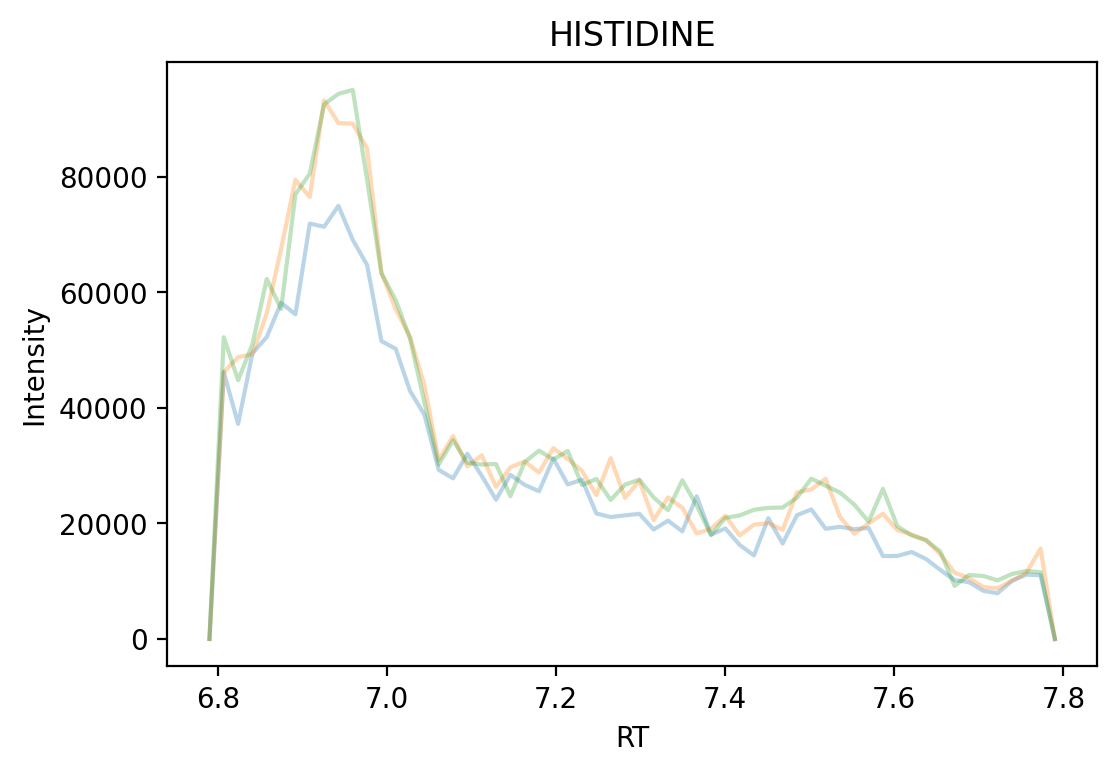

In [28]:
for mz,rt,name in real_peaks:
    if name in misClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC(raw_data,mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

In [29]:
corClass = df[df["classification"] == "true peak"]
corClass

metabolite classification  \
0                  Fructose 1,6-bisphosphate      true peak   
1                                Citric acid      true peak   
2                            Acetoacetyl-CoA      true peak   
3                                 Acetyl-CoA      true peak   
4                            Chelidamic Acid      true peak   
..                                       ...            ...   
182                                THREONINE      true peak   
183                                TREHALOSE      true peak   
184                                  URIDINE      true peak   
185  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      true peak   
186                             OXOGLUTARATE      true peak   

                       sample  
0    M3T-Std_neg_DDA_1mz.mzML  
1    M3T-Std_neg_DDA_1mz.mzML  
2    M3T-Std_neg_DDA_1mz.mzML  
3    M3T-Std_neg_DDA_1mz.mzML  
4    M3T-Std_neg_DDA_1mz.mzML  
..                        ...  
182  M3T-Std_neg_DDA_5mz.mzML  
183  M3T-Std_neg_DDA_5mz.mzML  
184  M3T-Std_neg_DDA_5mz.mzML  
185  M3T-Std_neg_DDA_5mz.mzML  
186  M3T-Std_neg_DDA_5mz.mzML  

[132 rows x 3 columns]

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



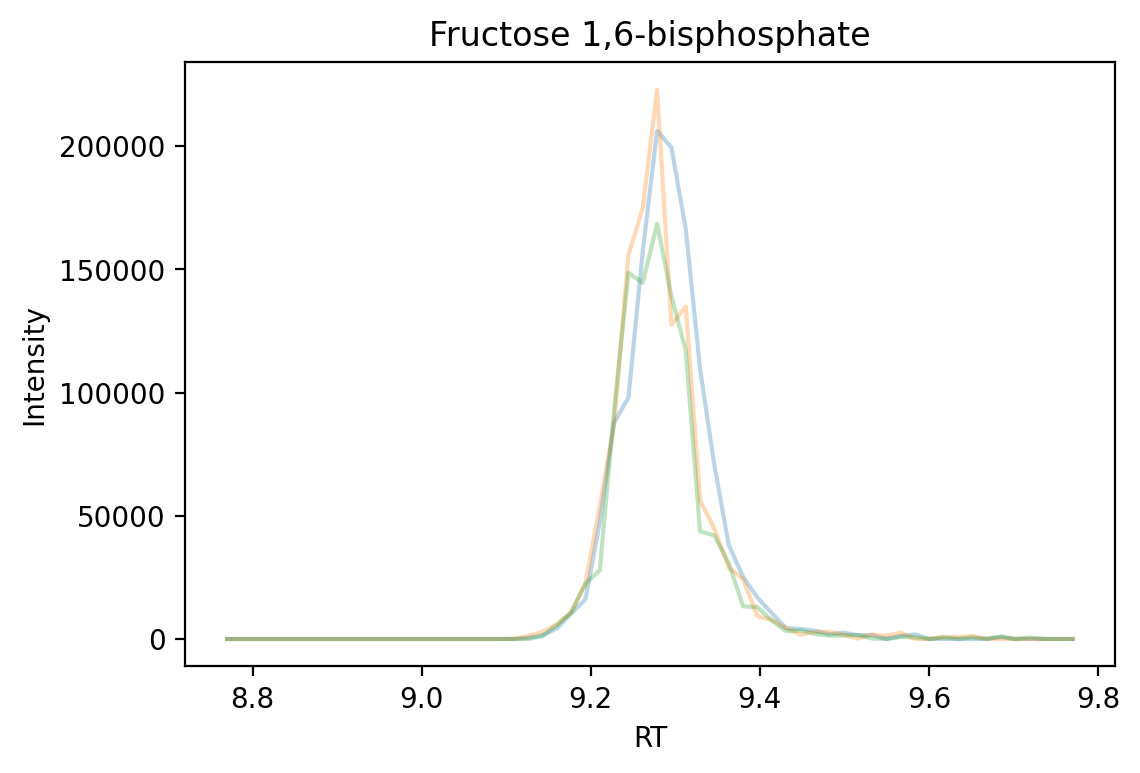

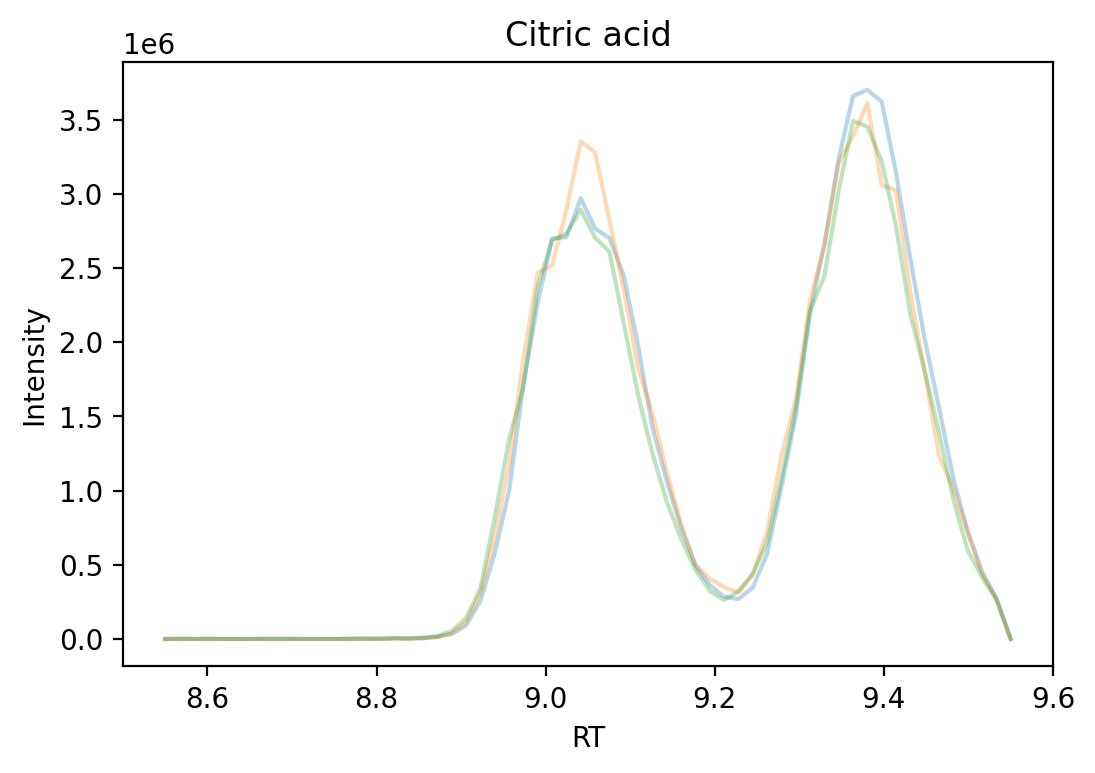

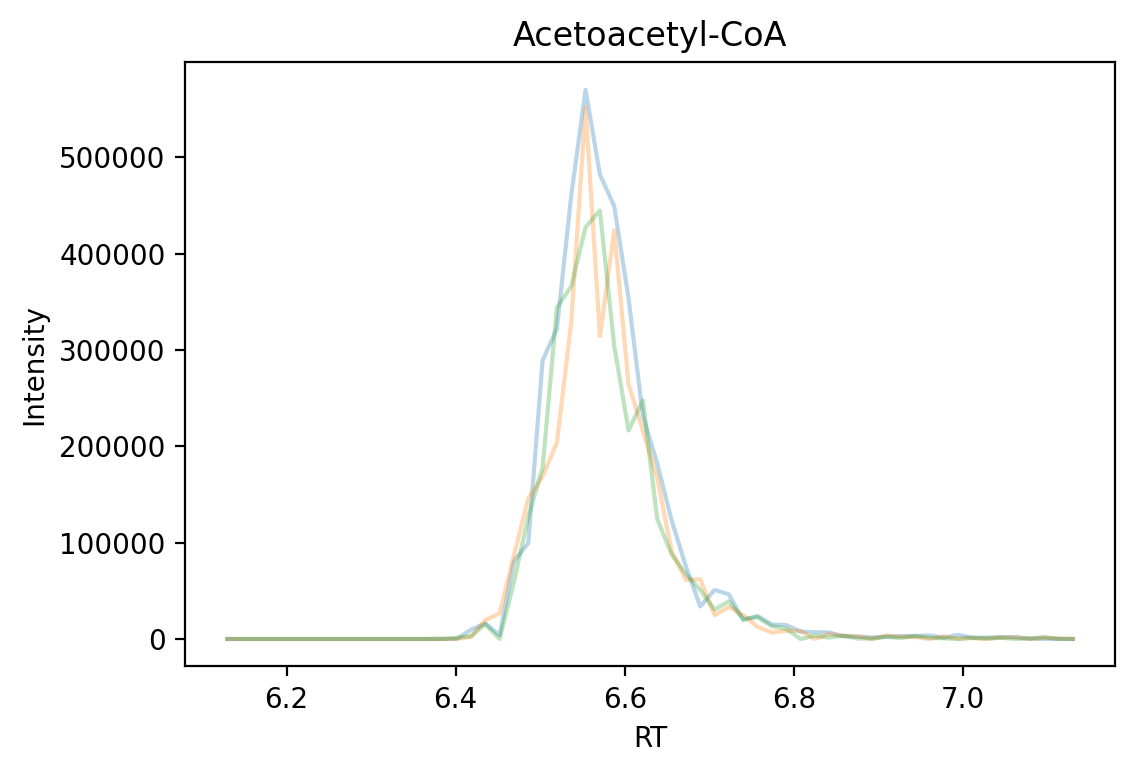

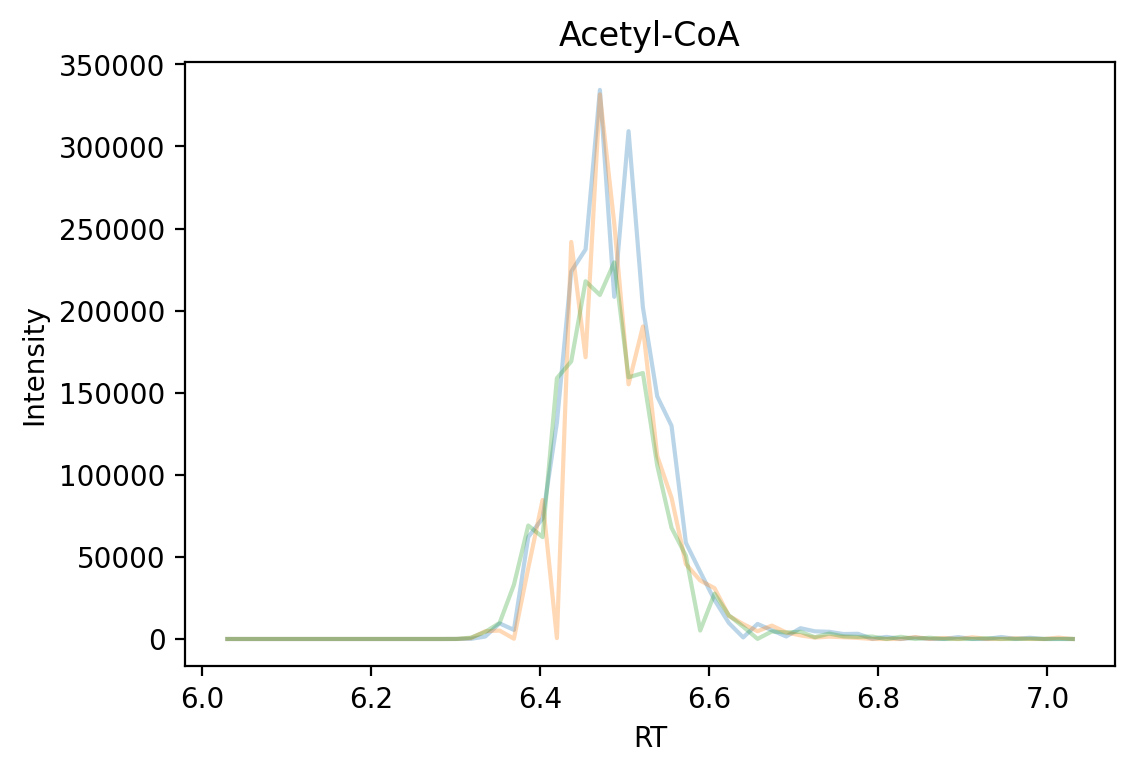

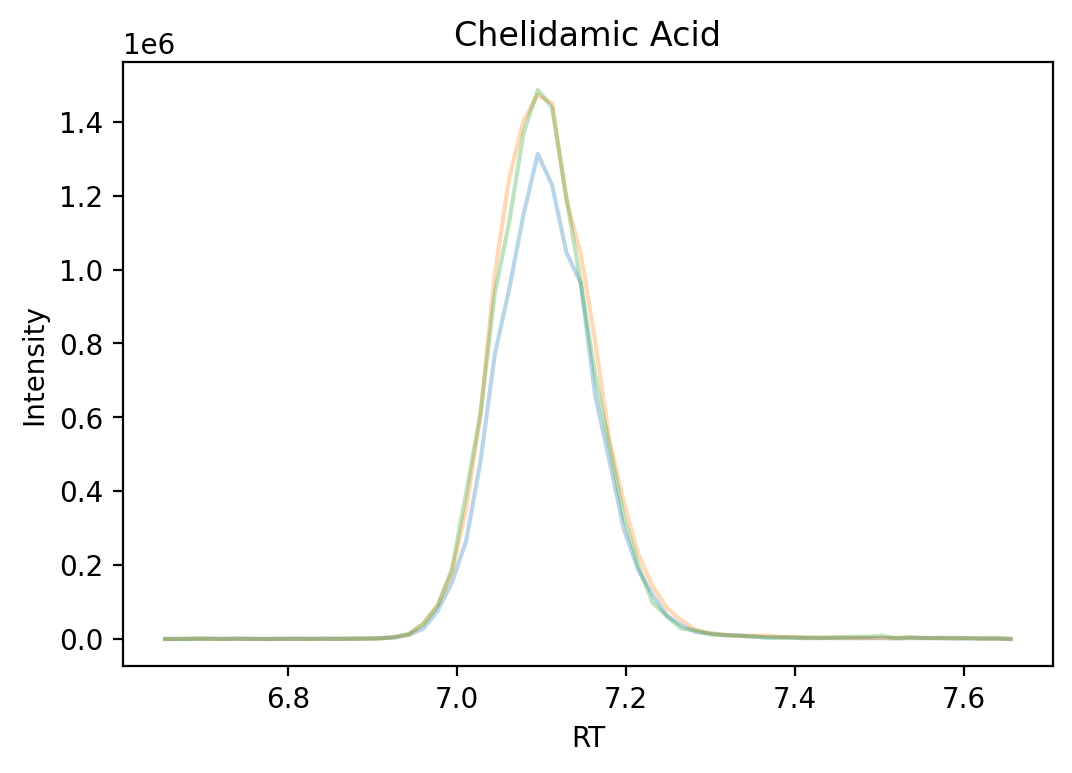

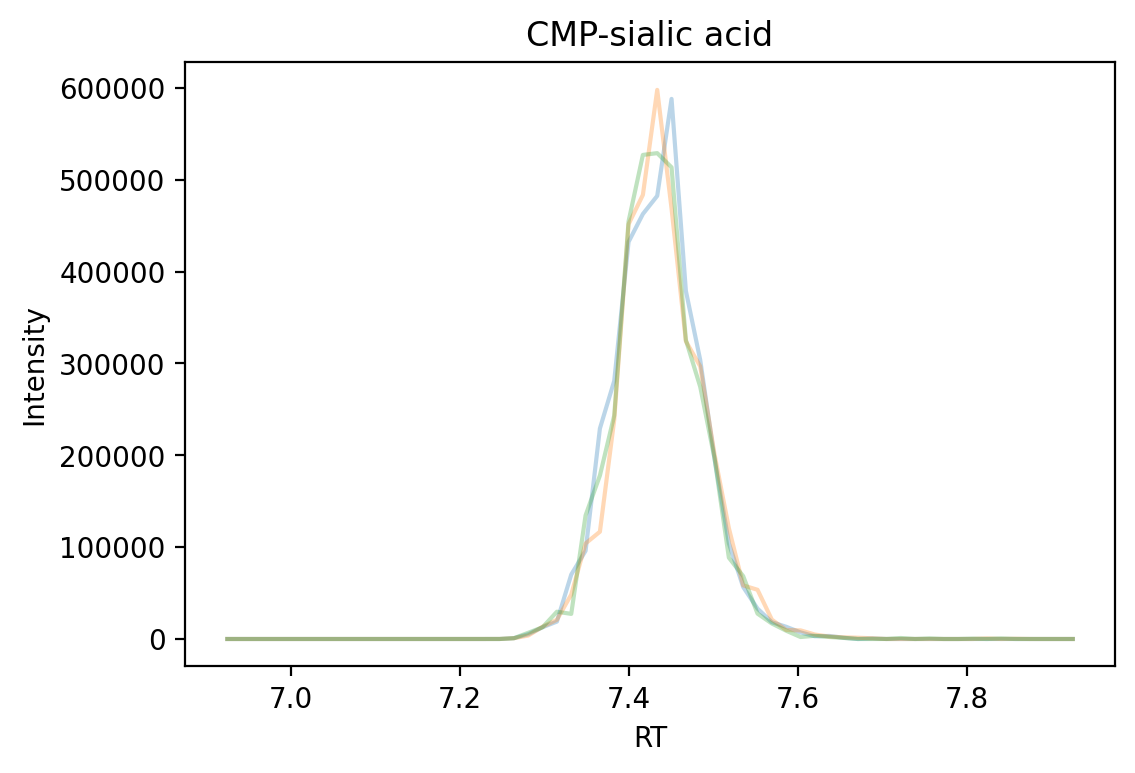

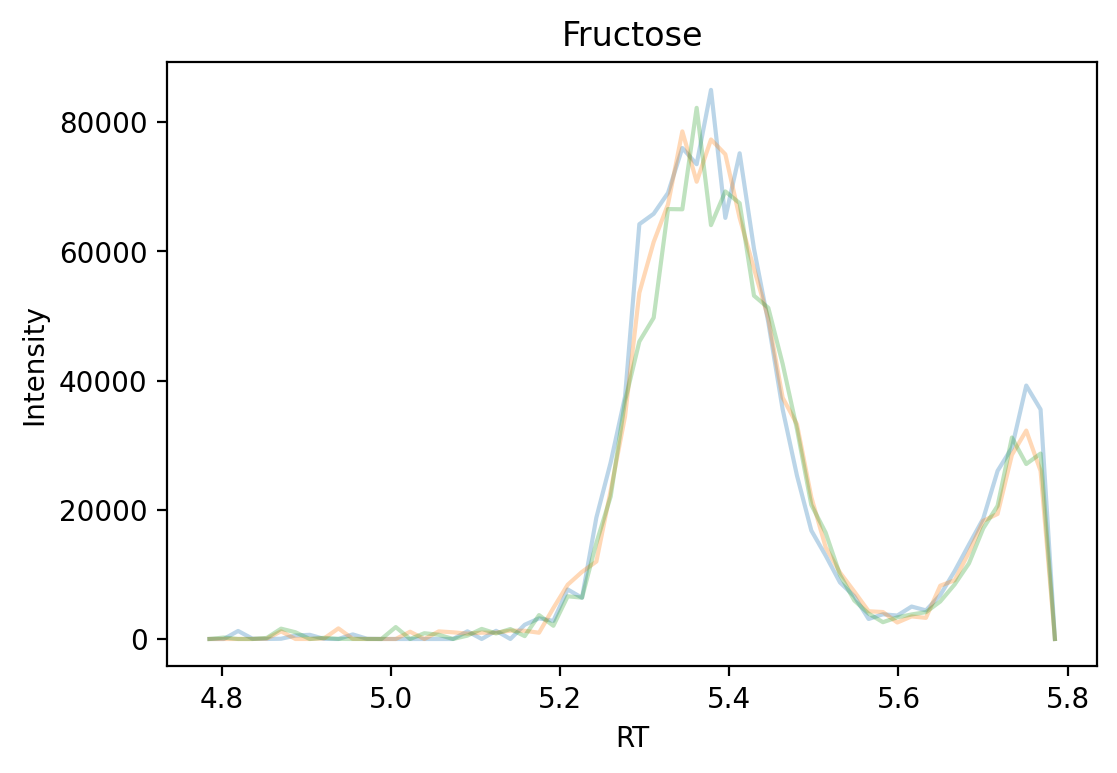

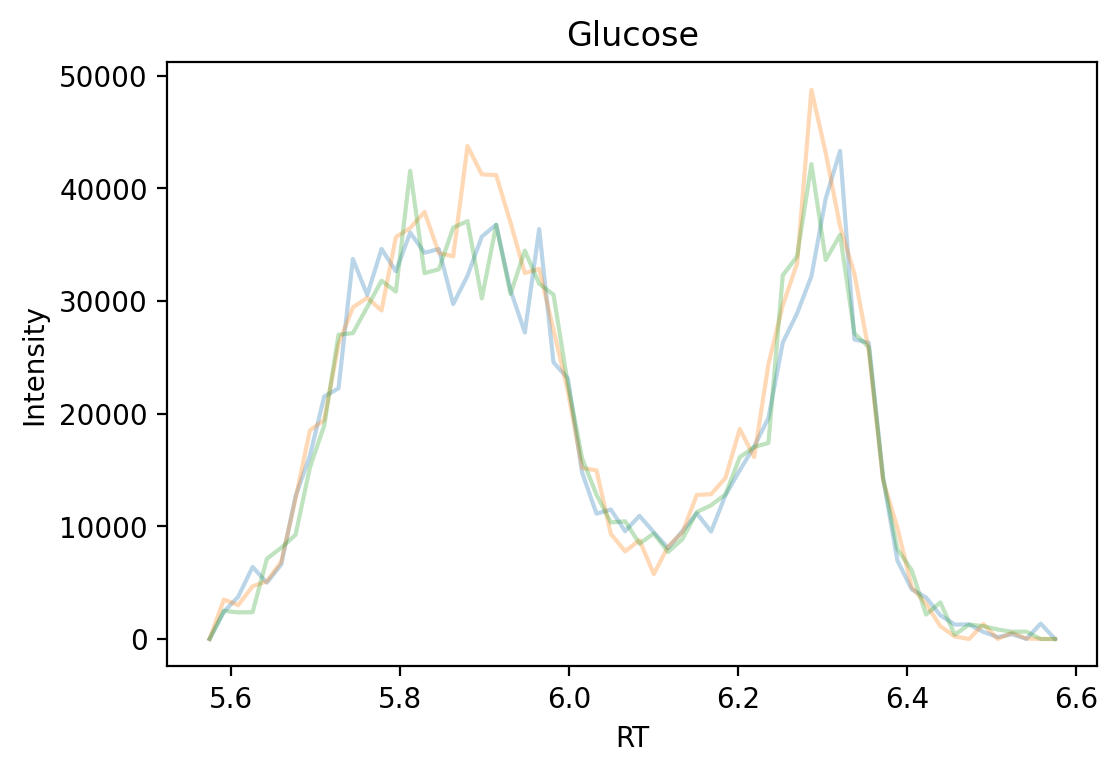

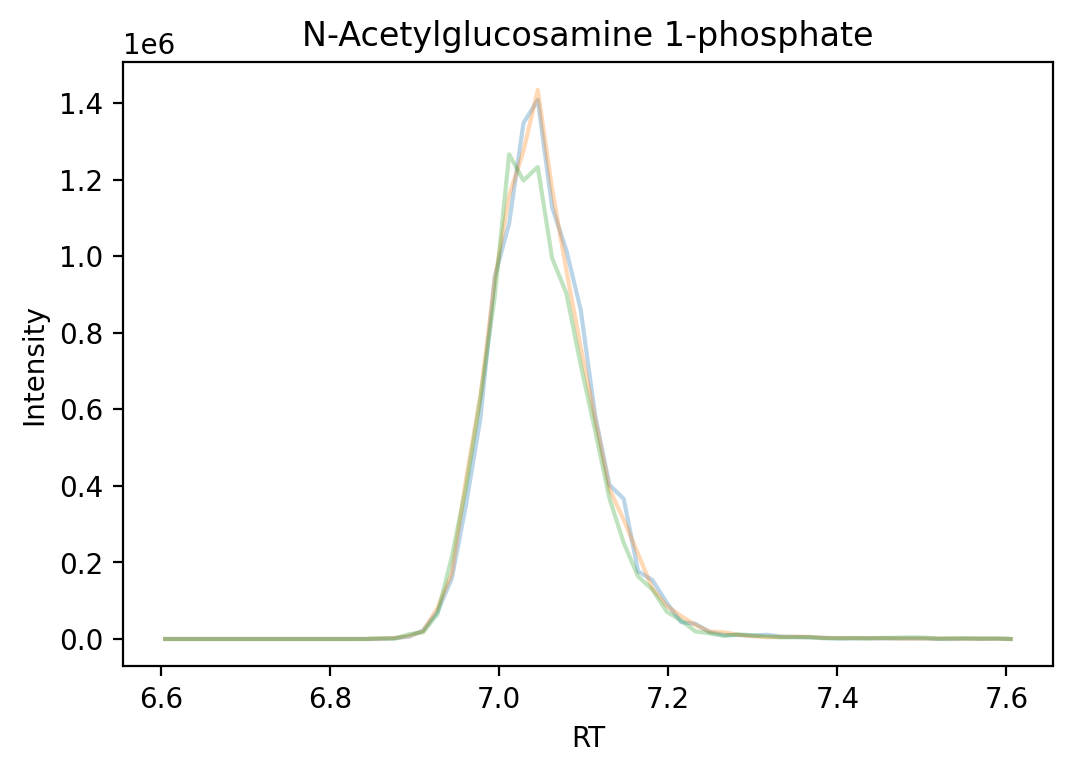

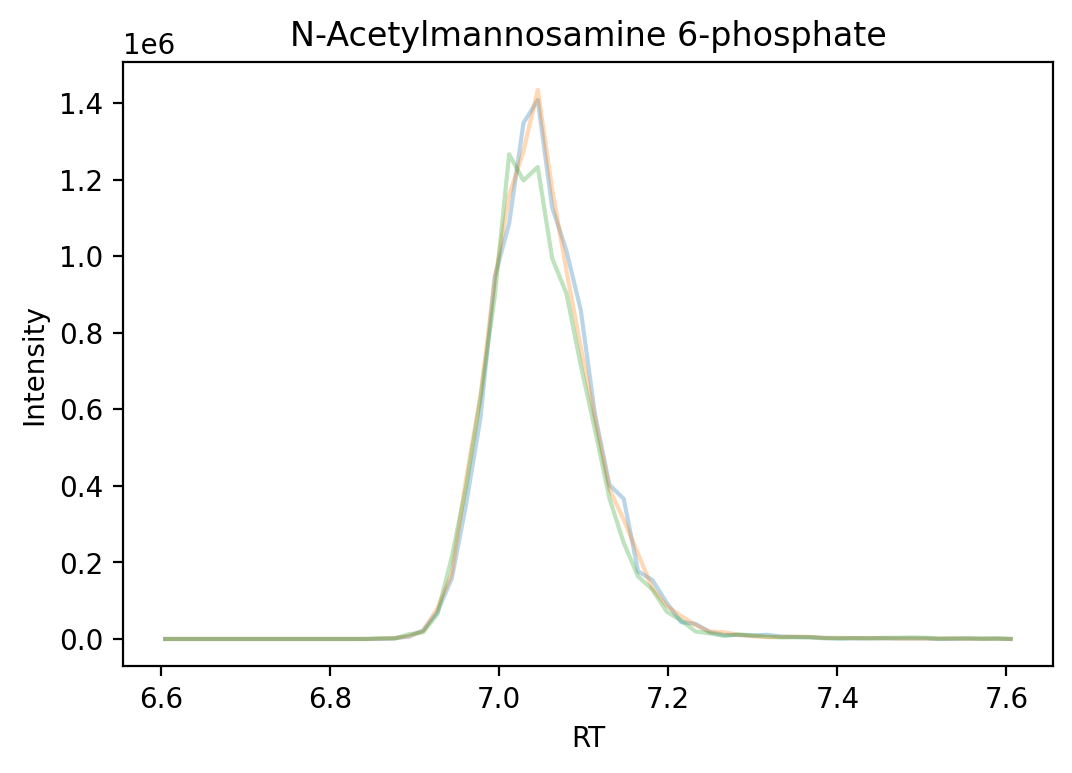

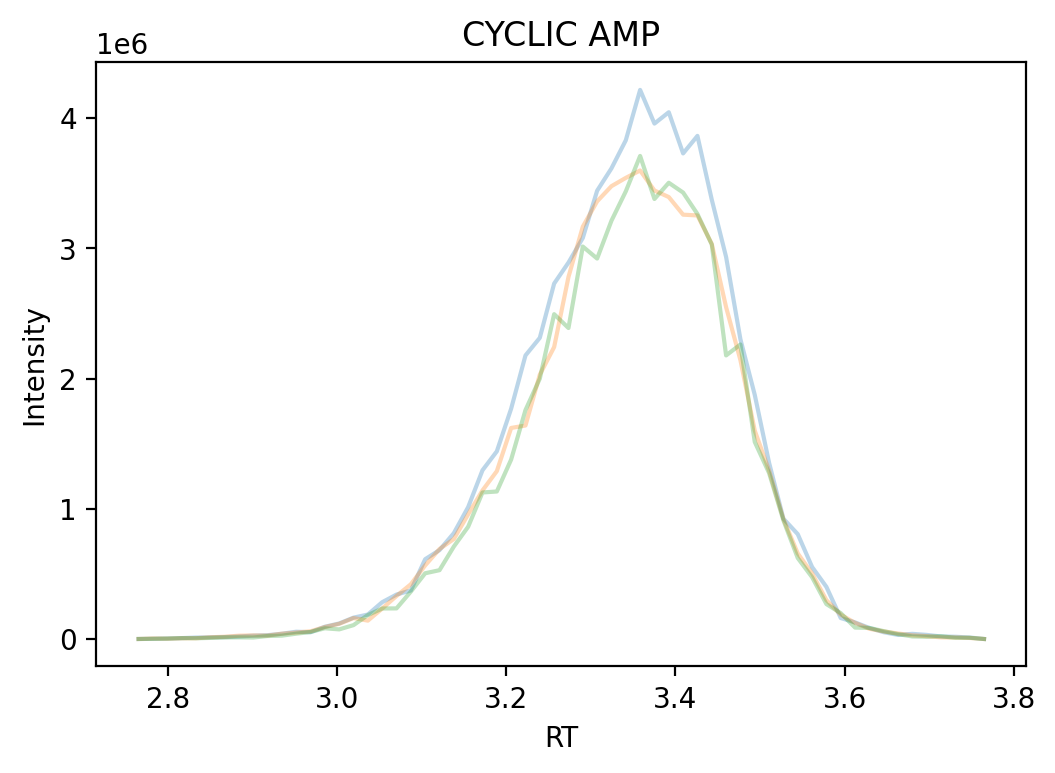

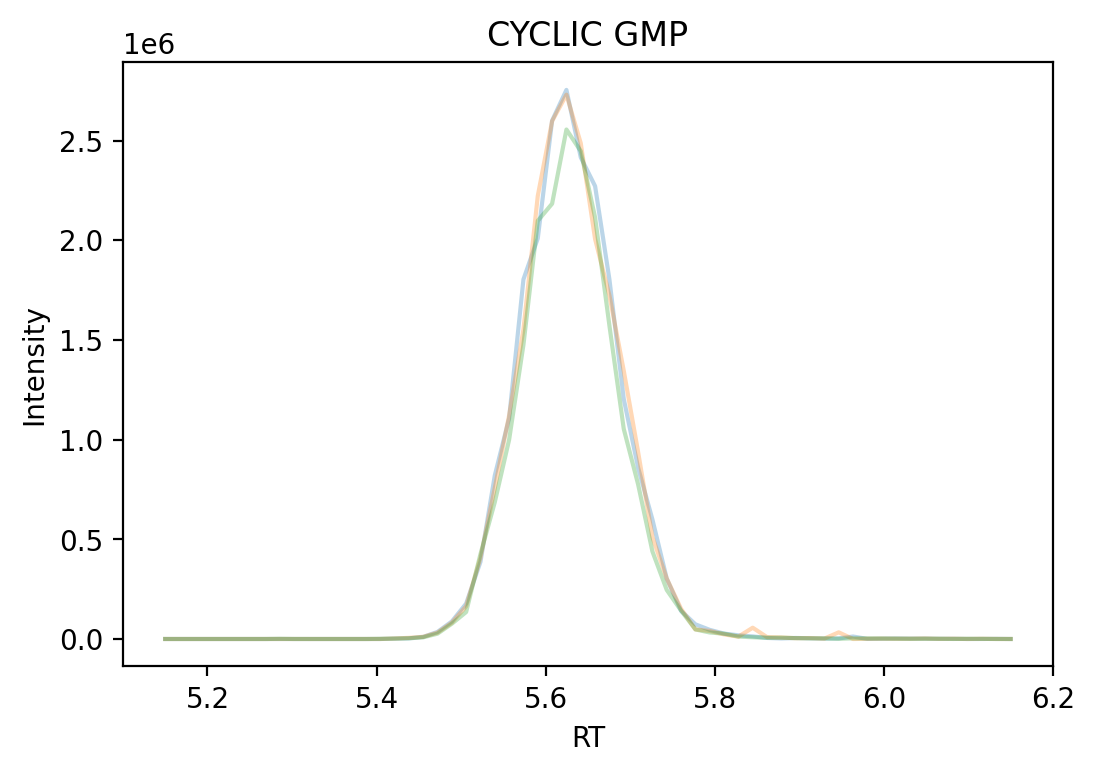

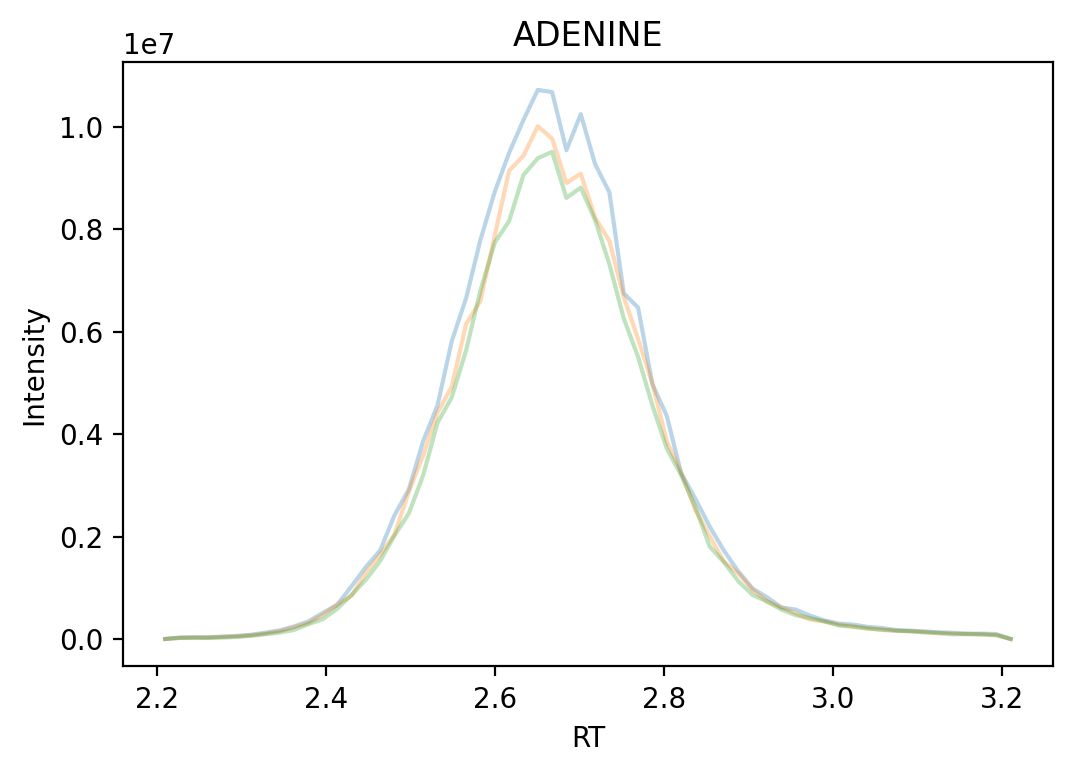

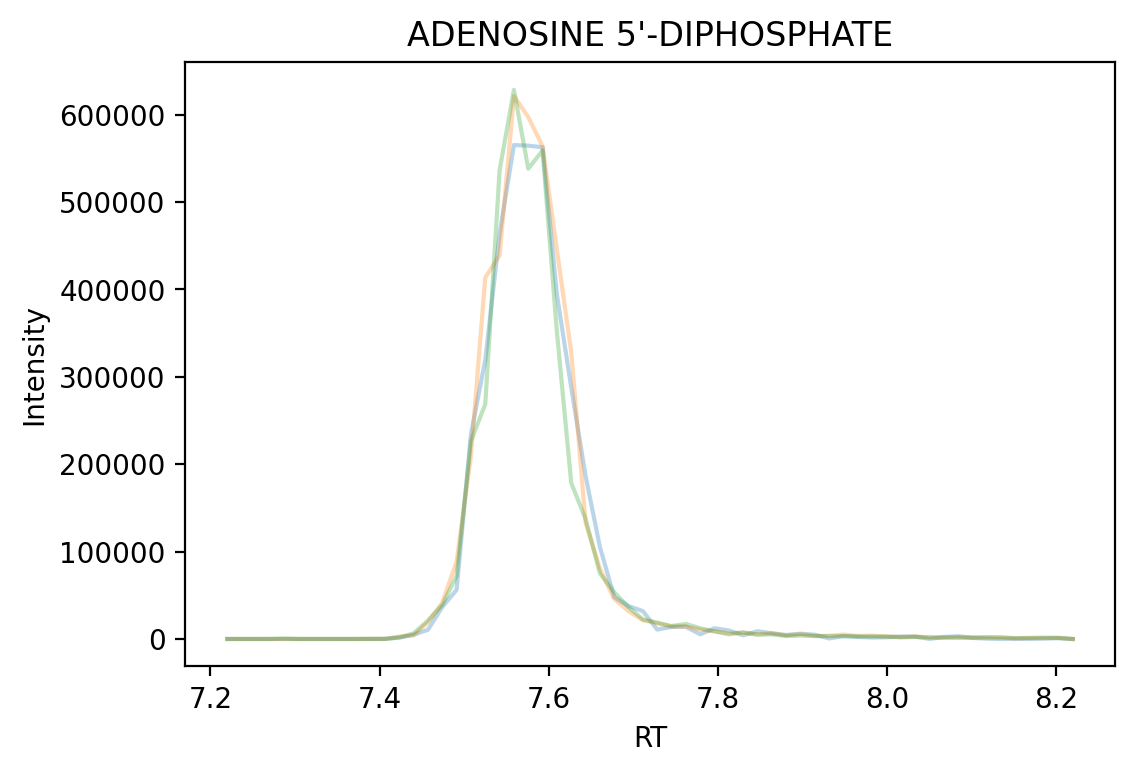

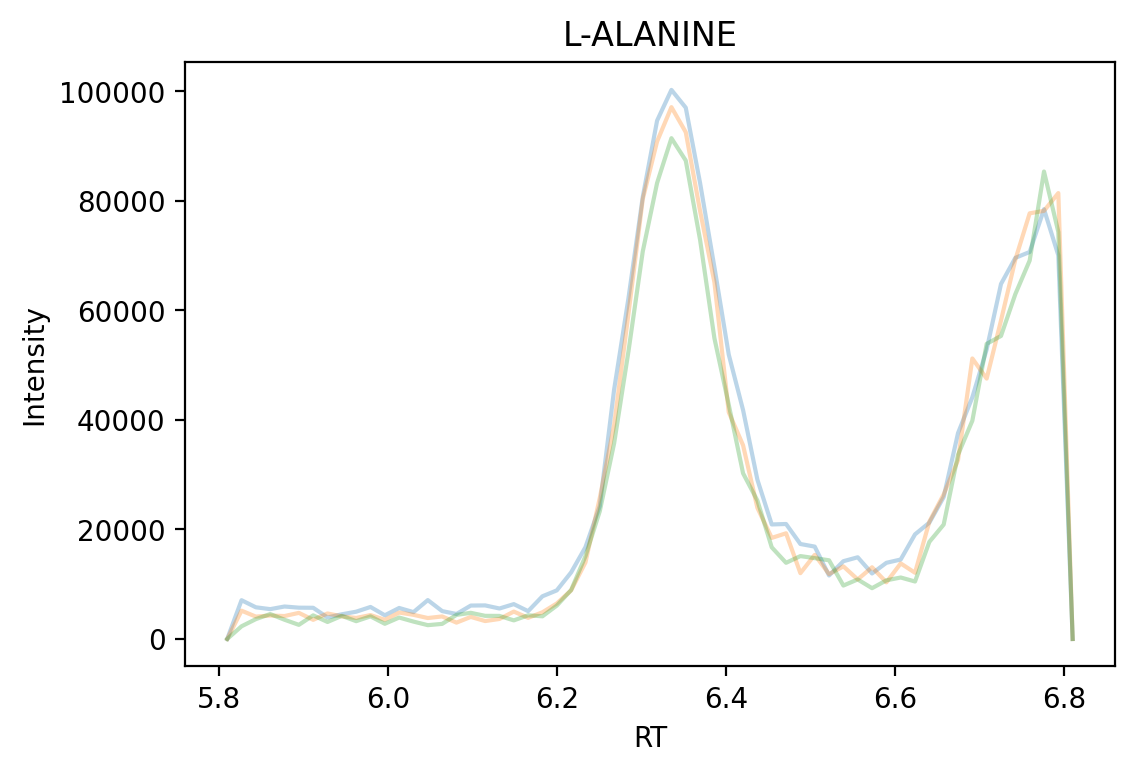

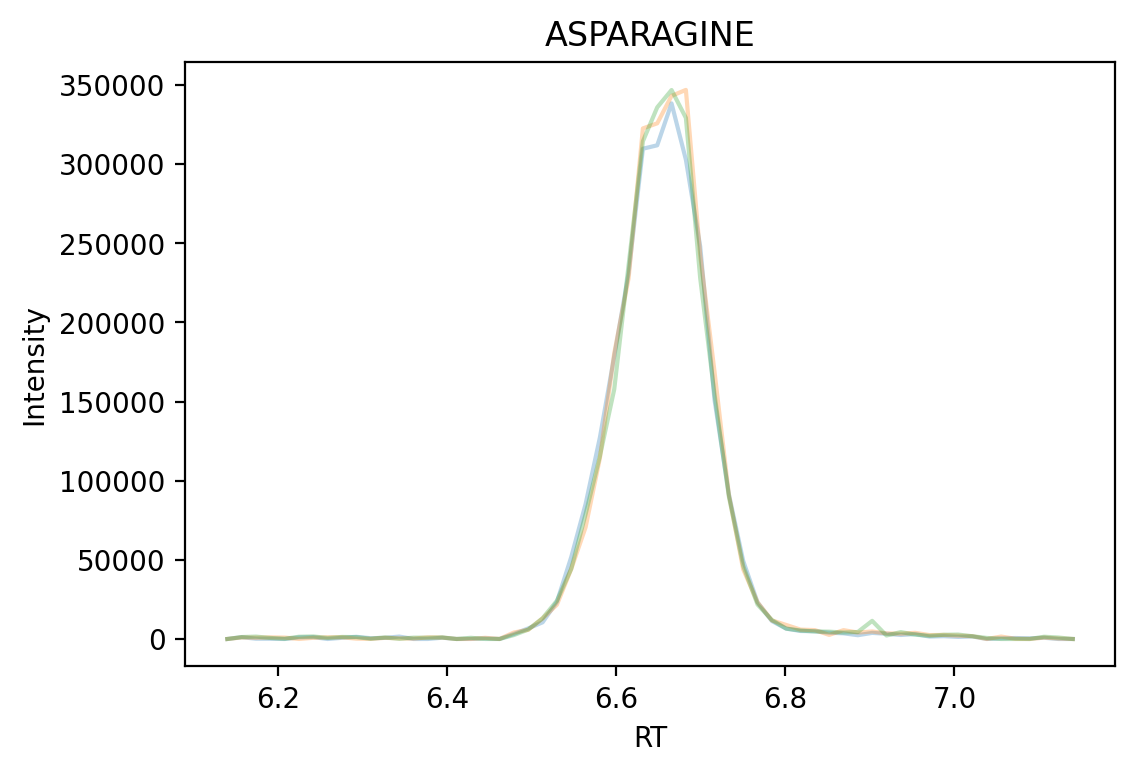

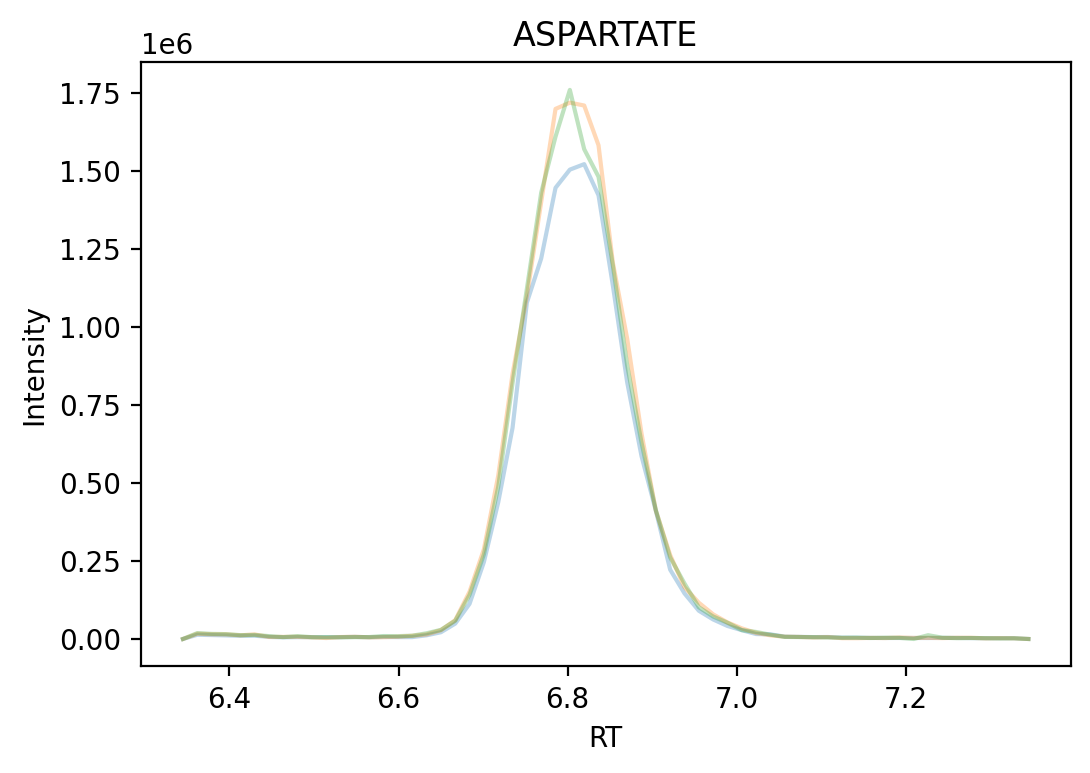

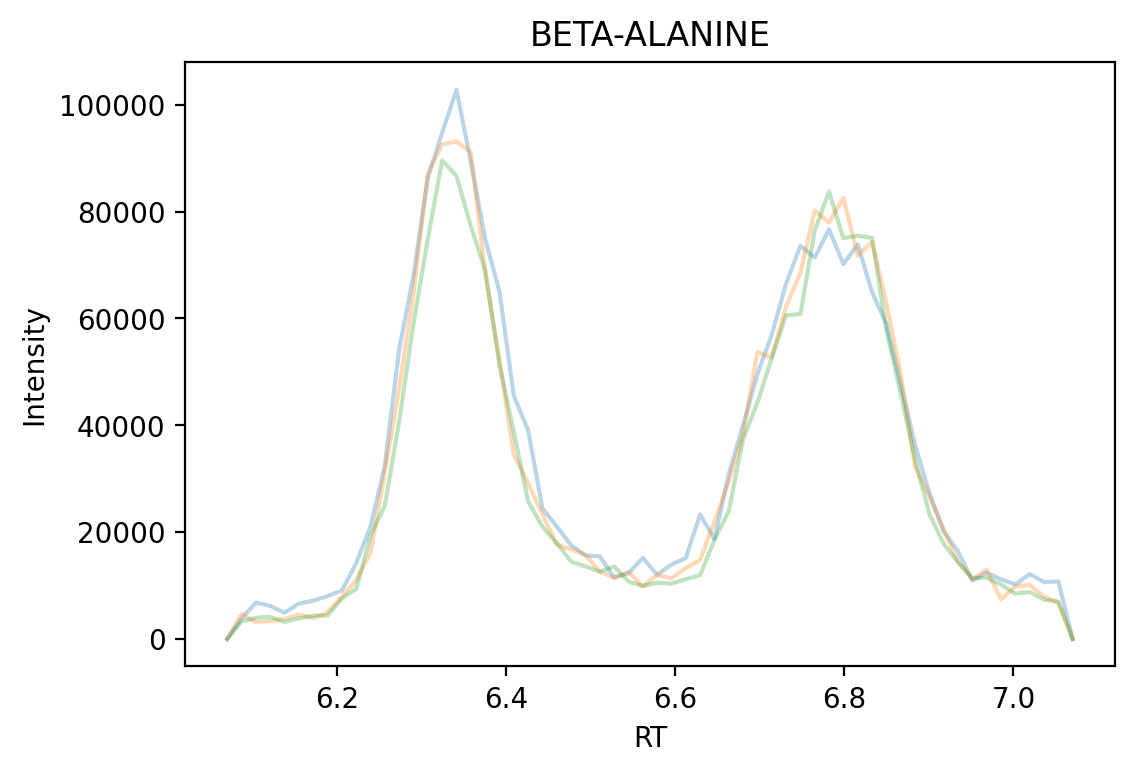

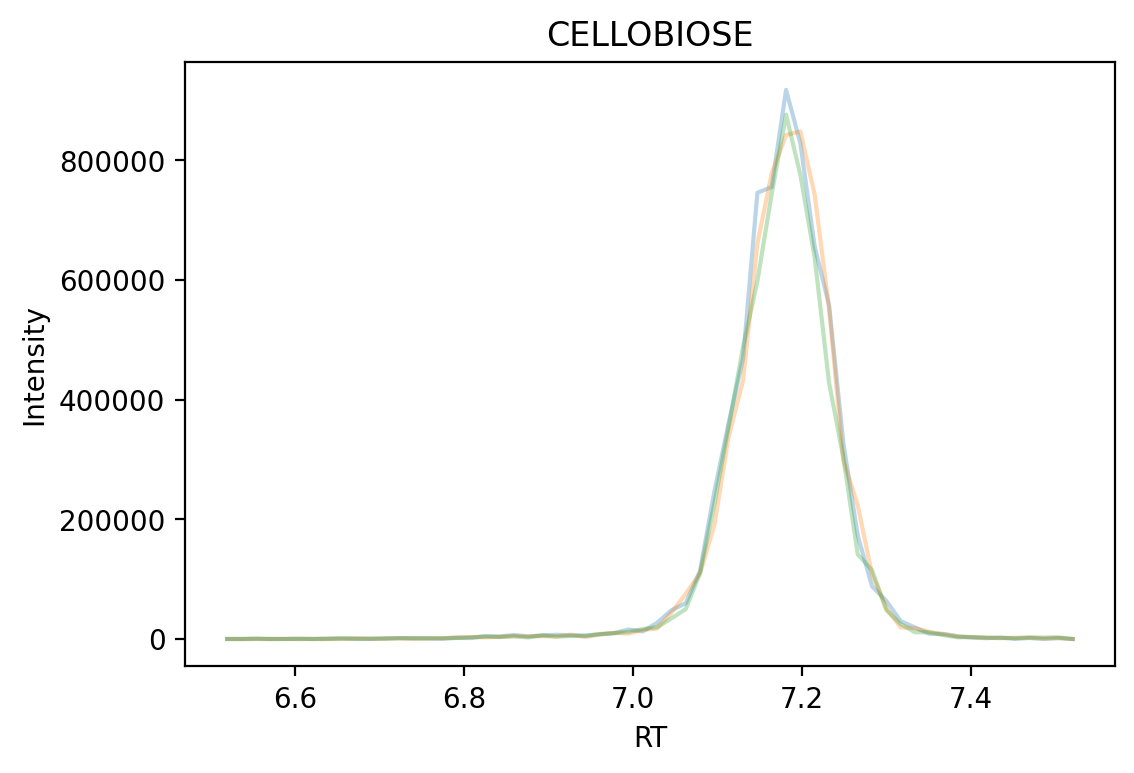

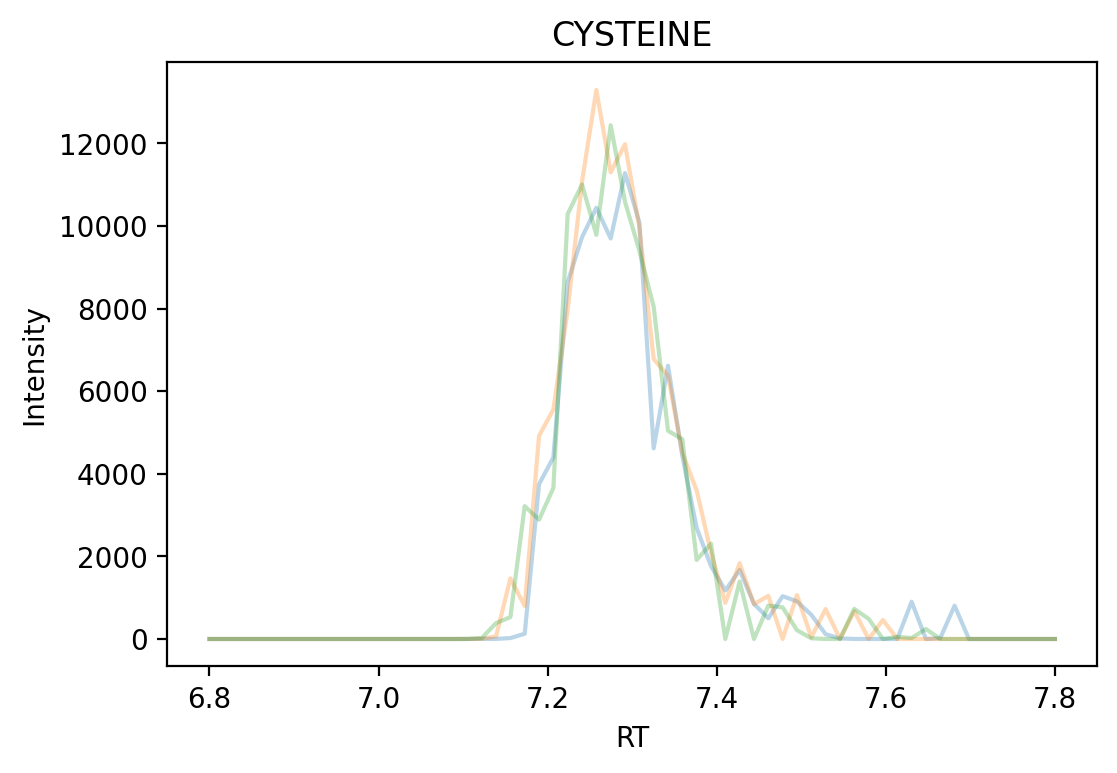

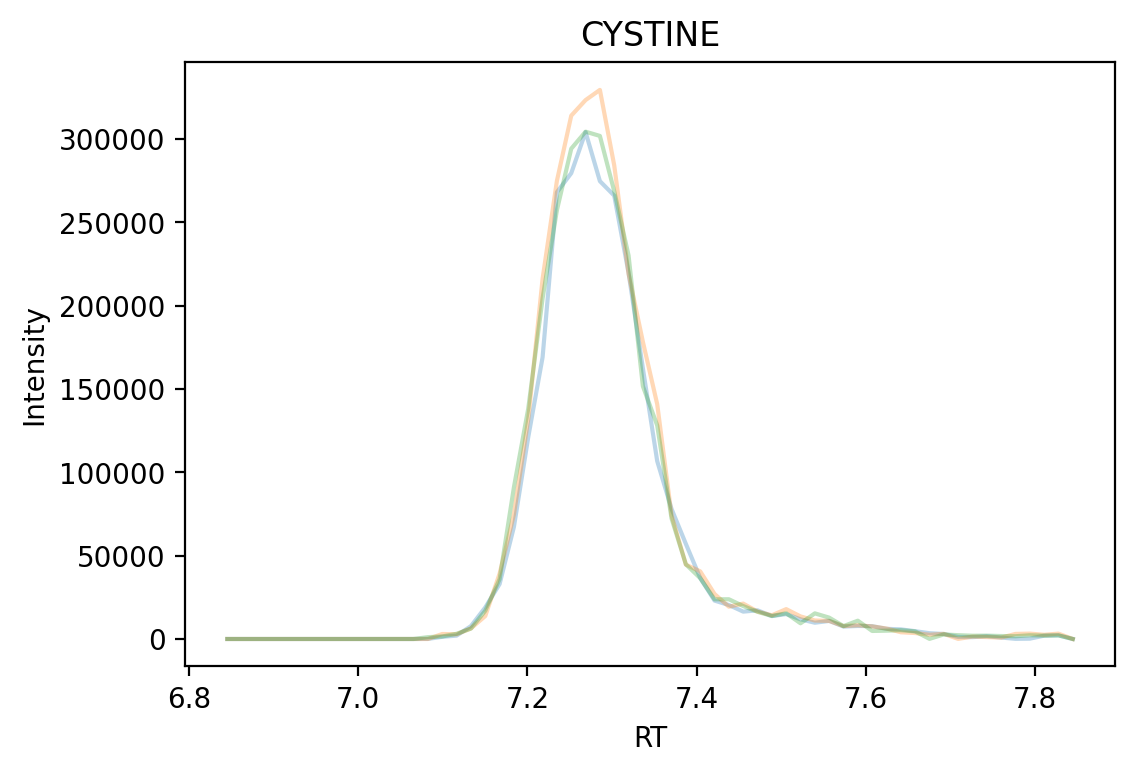

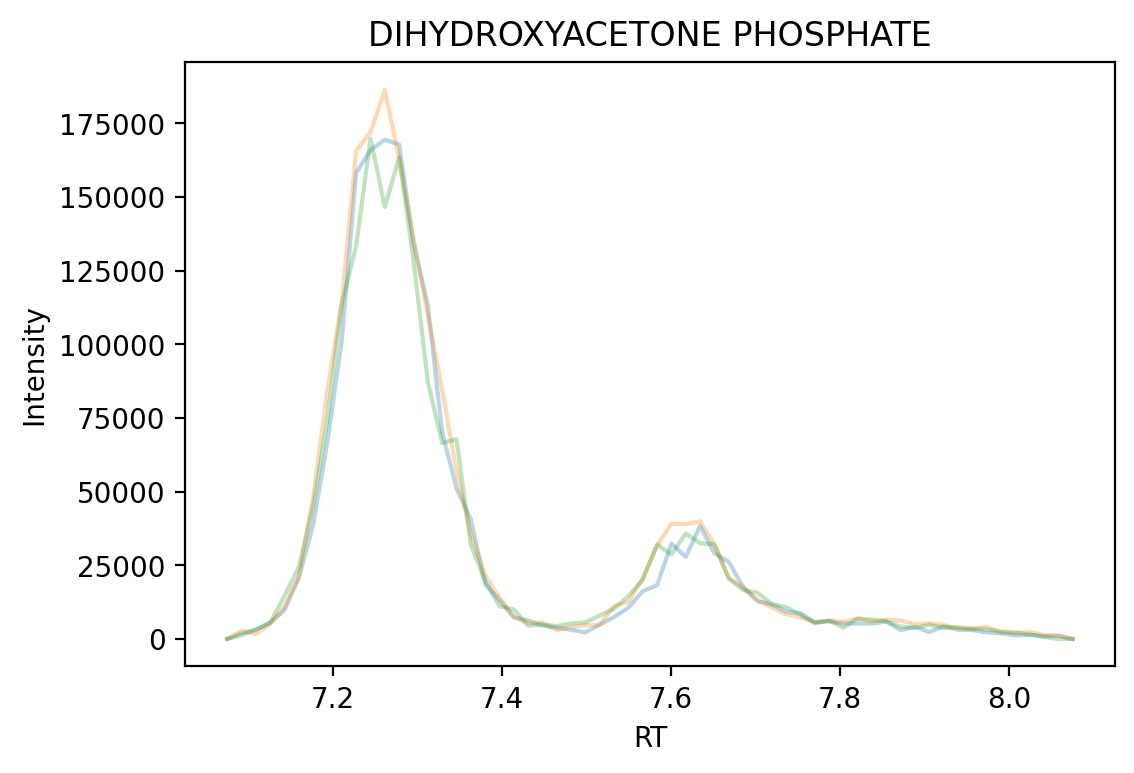

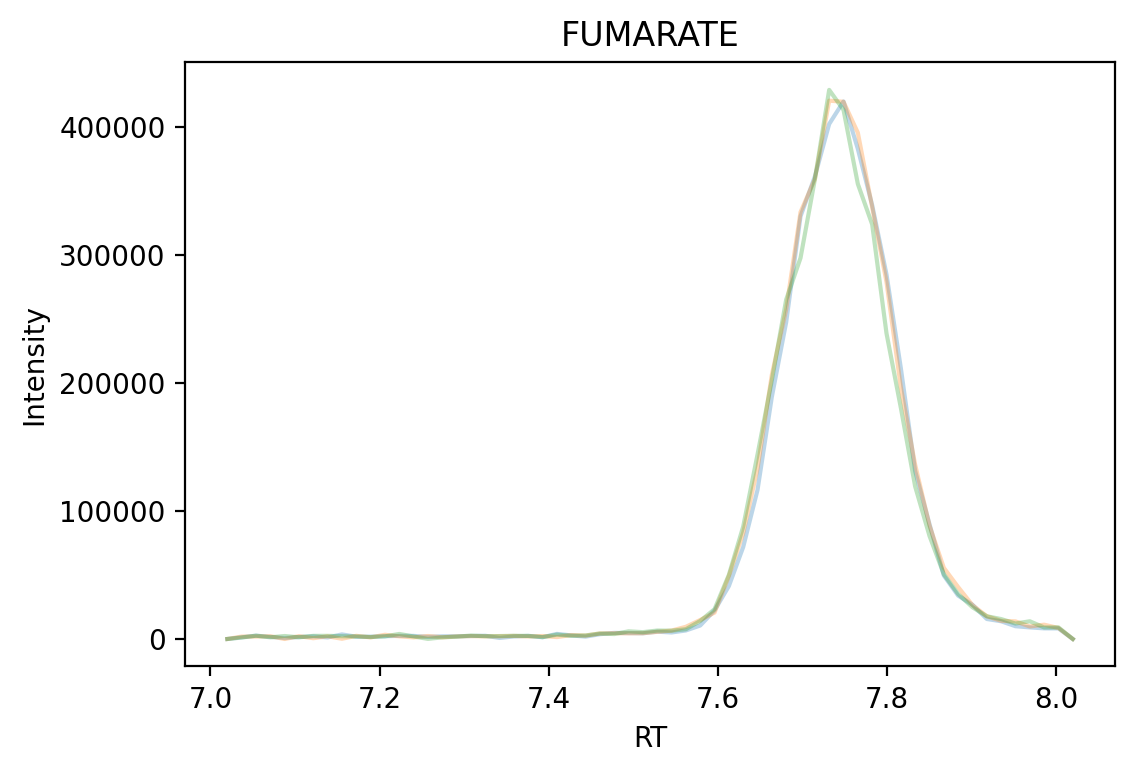

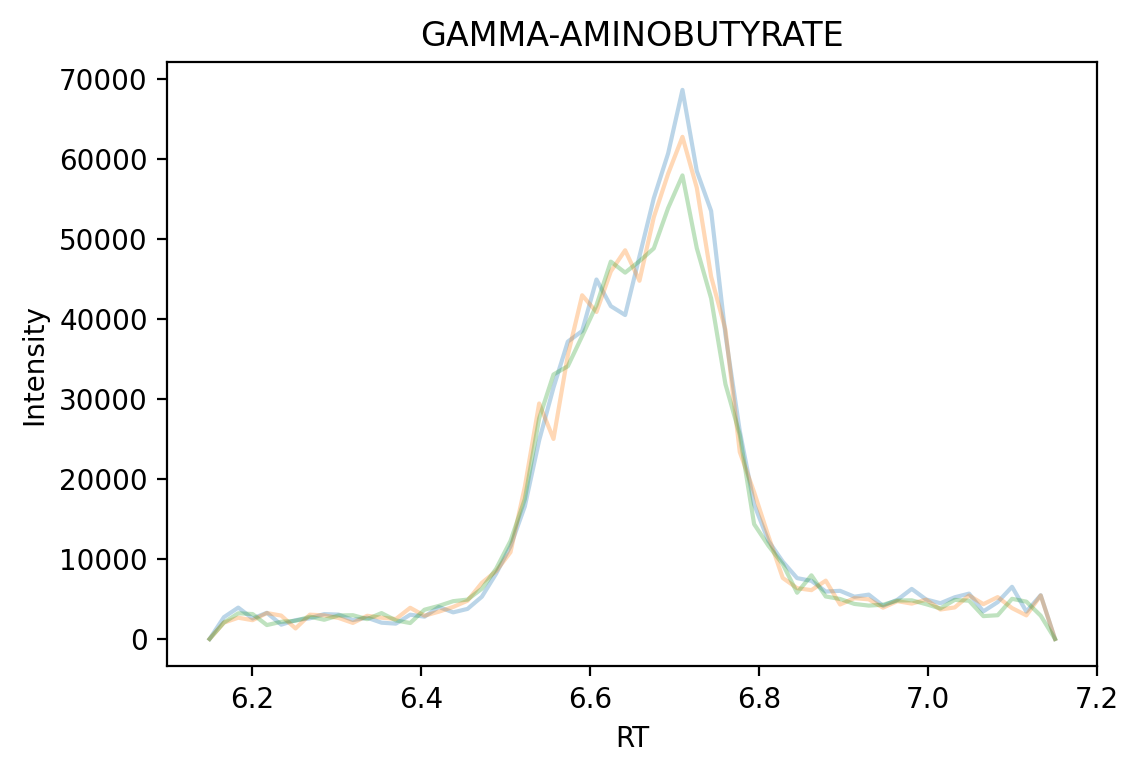

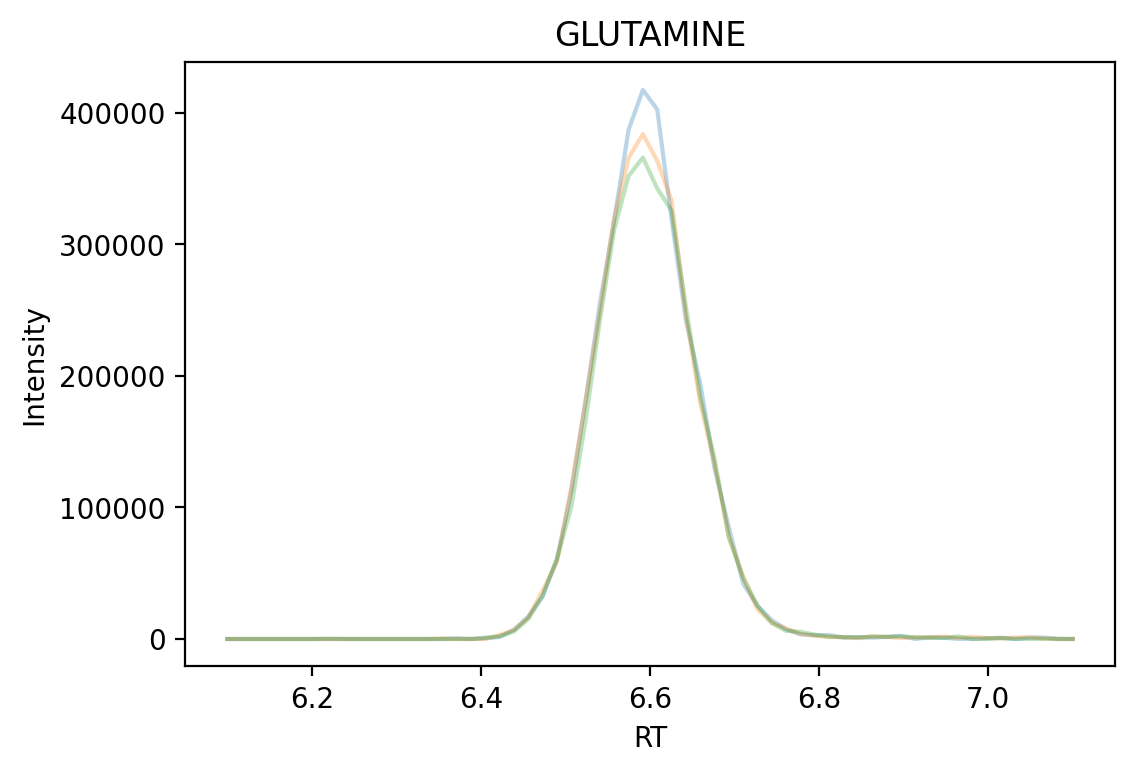

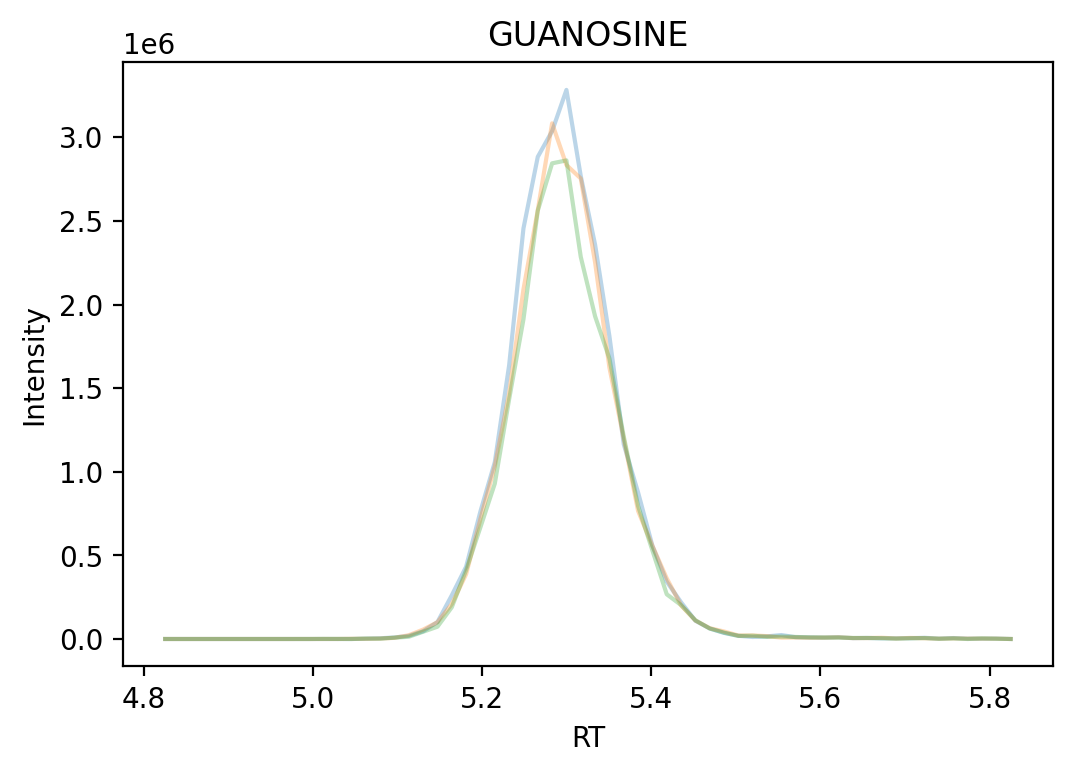

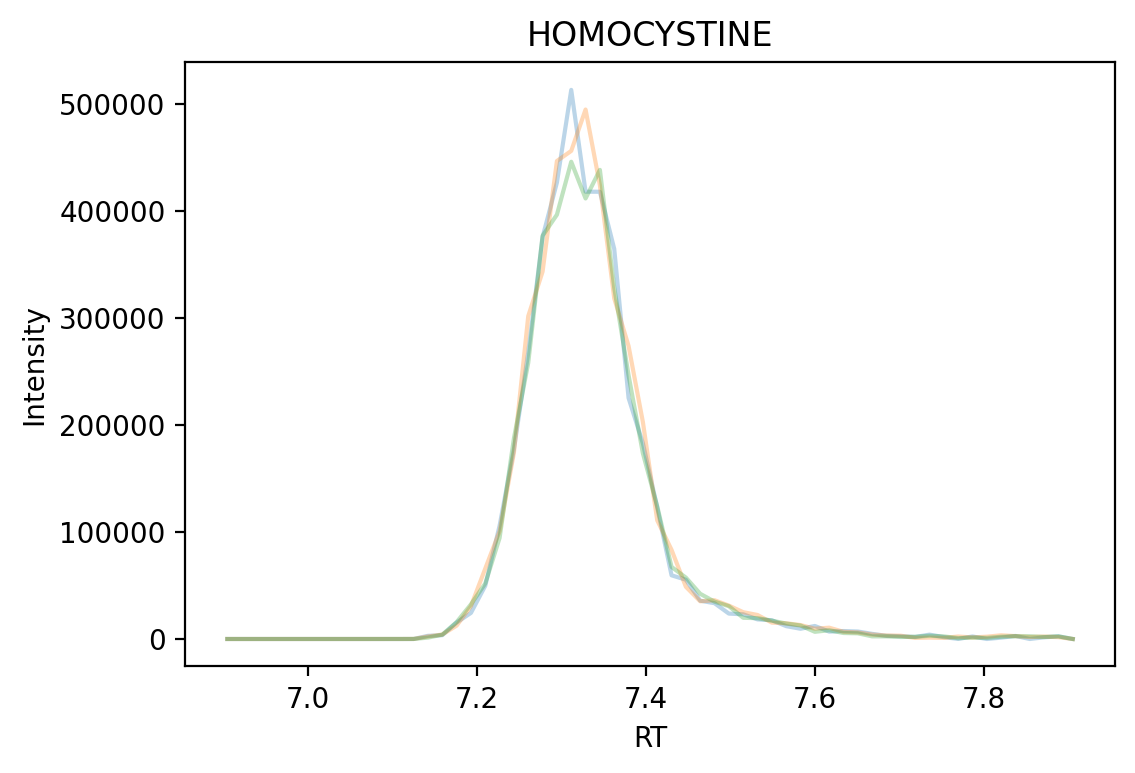

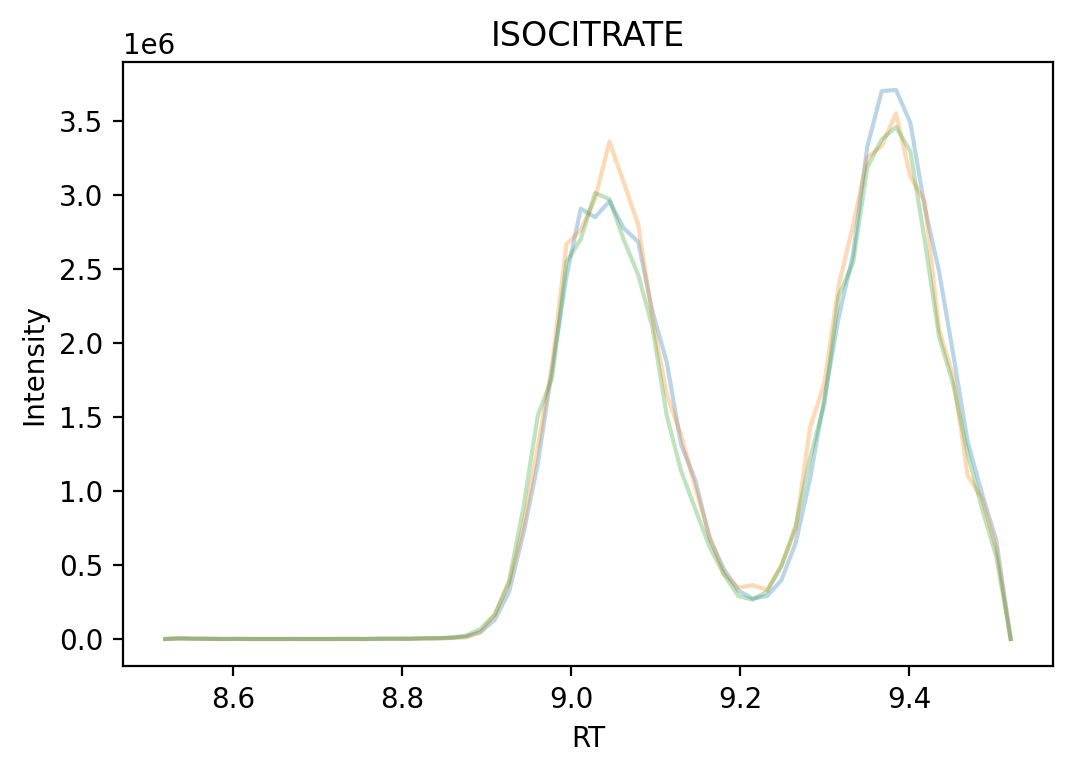

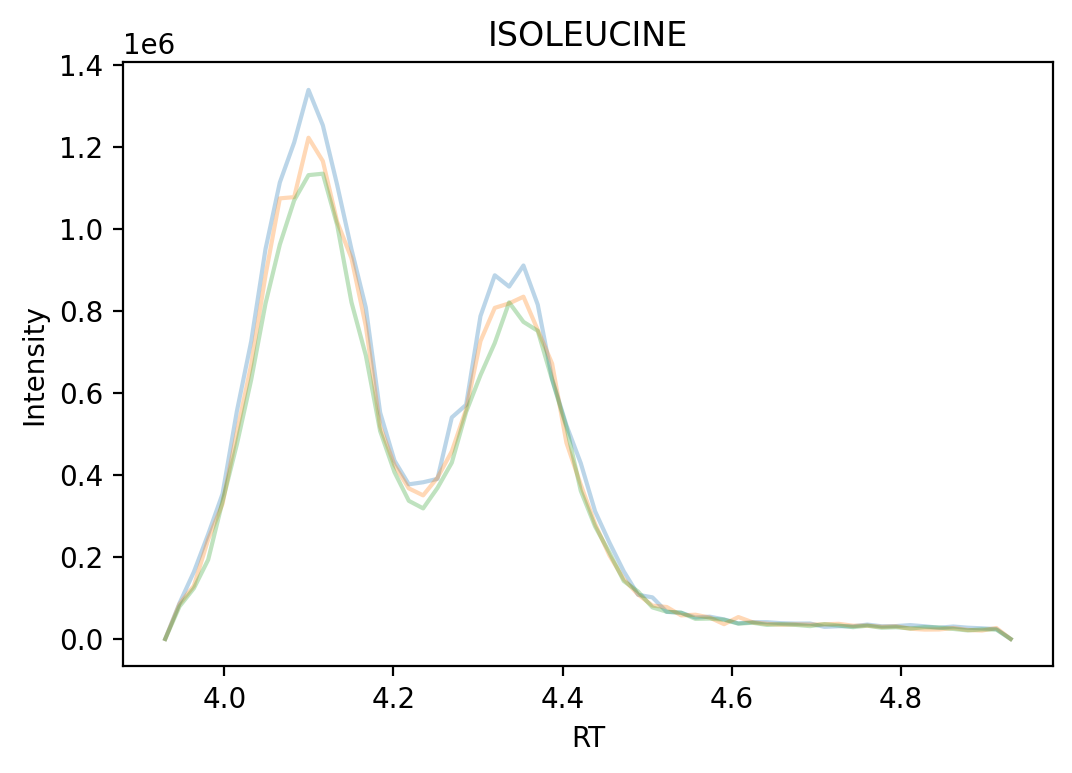

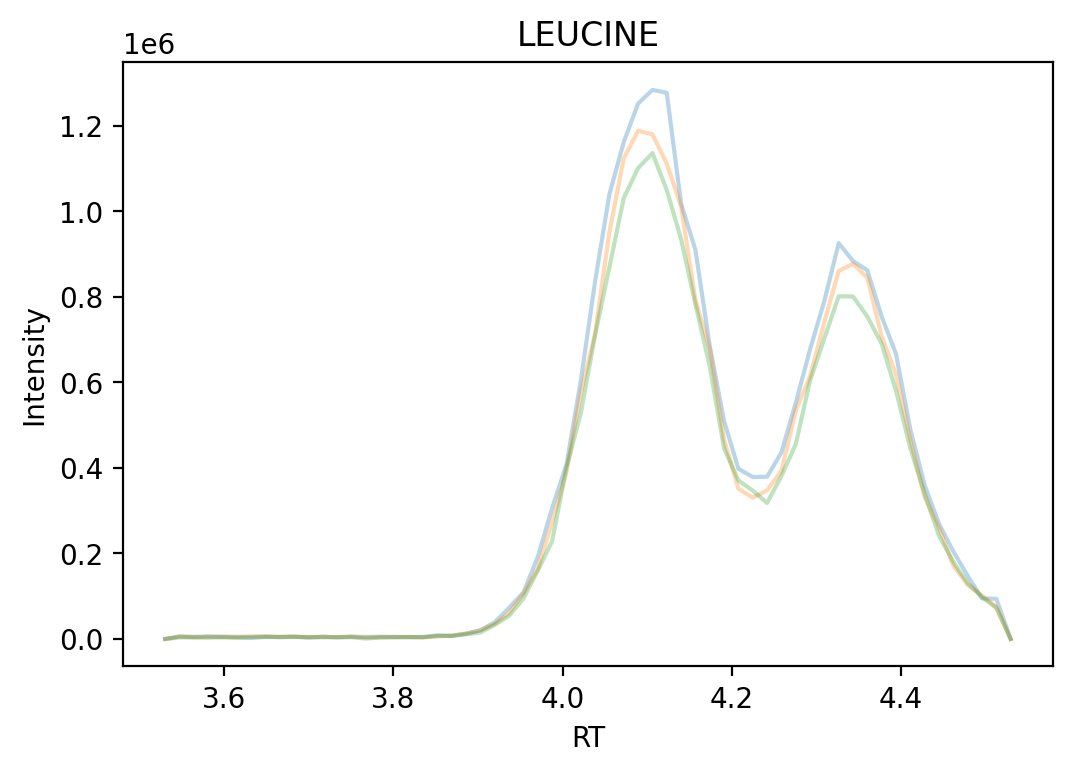

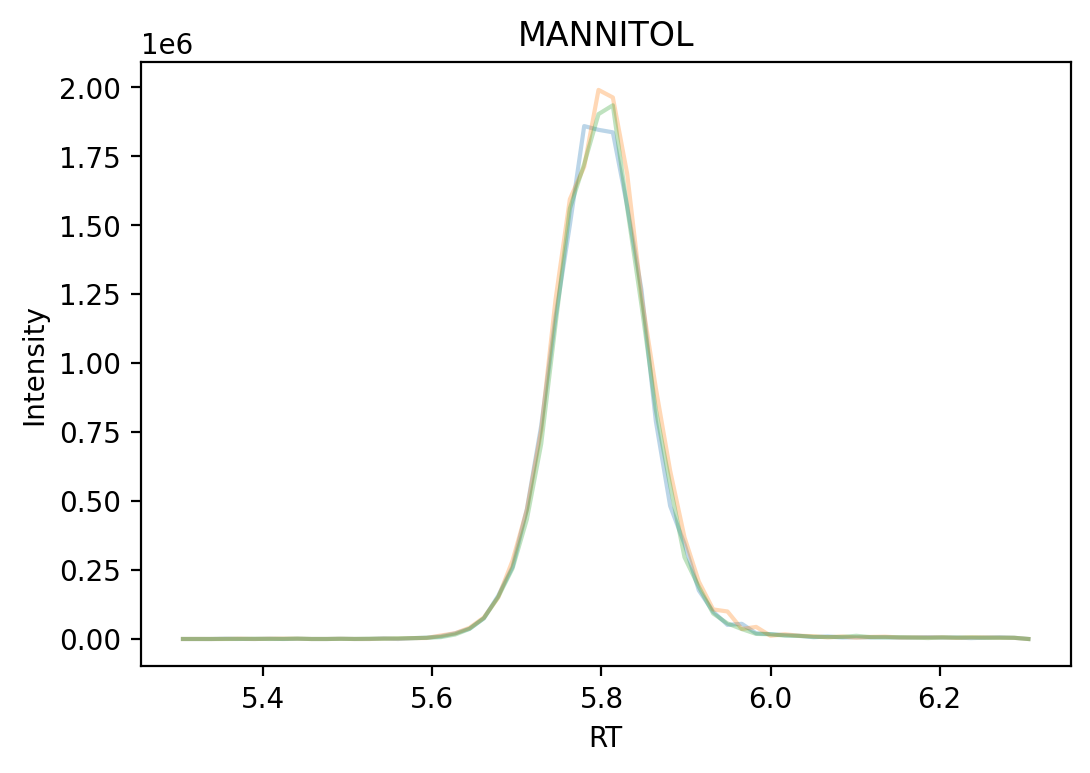

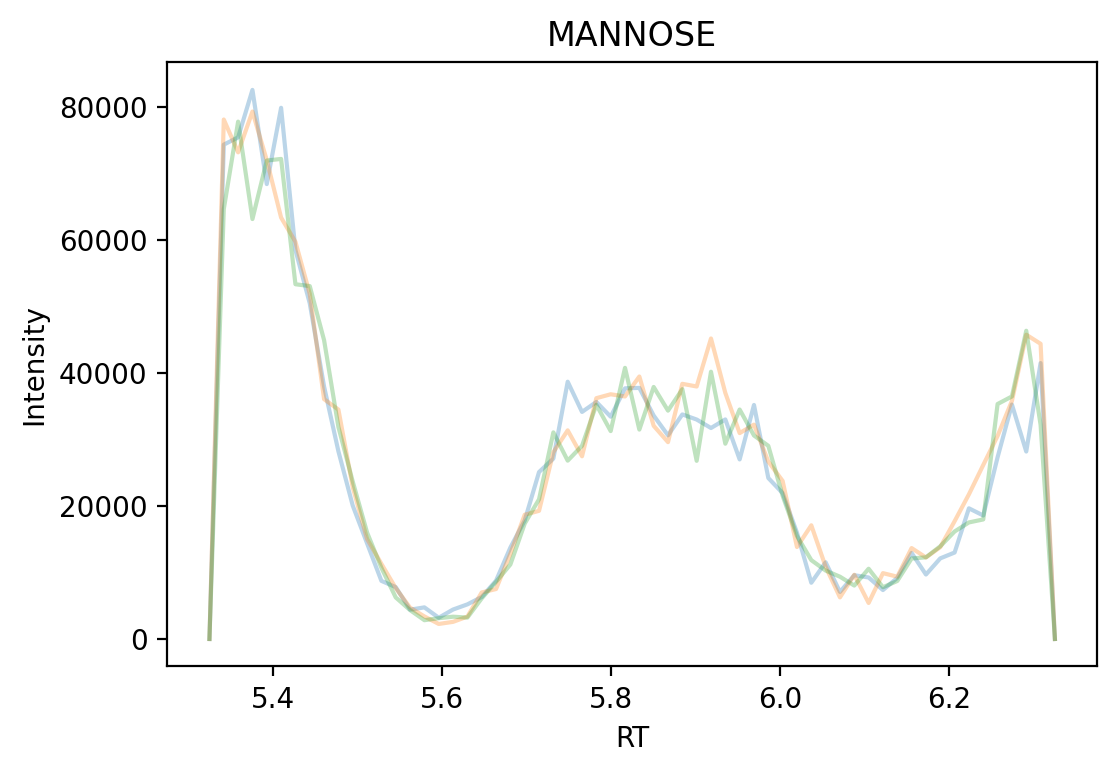

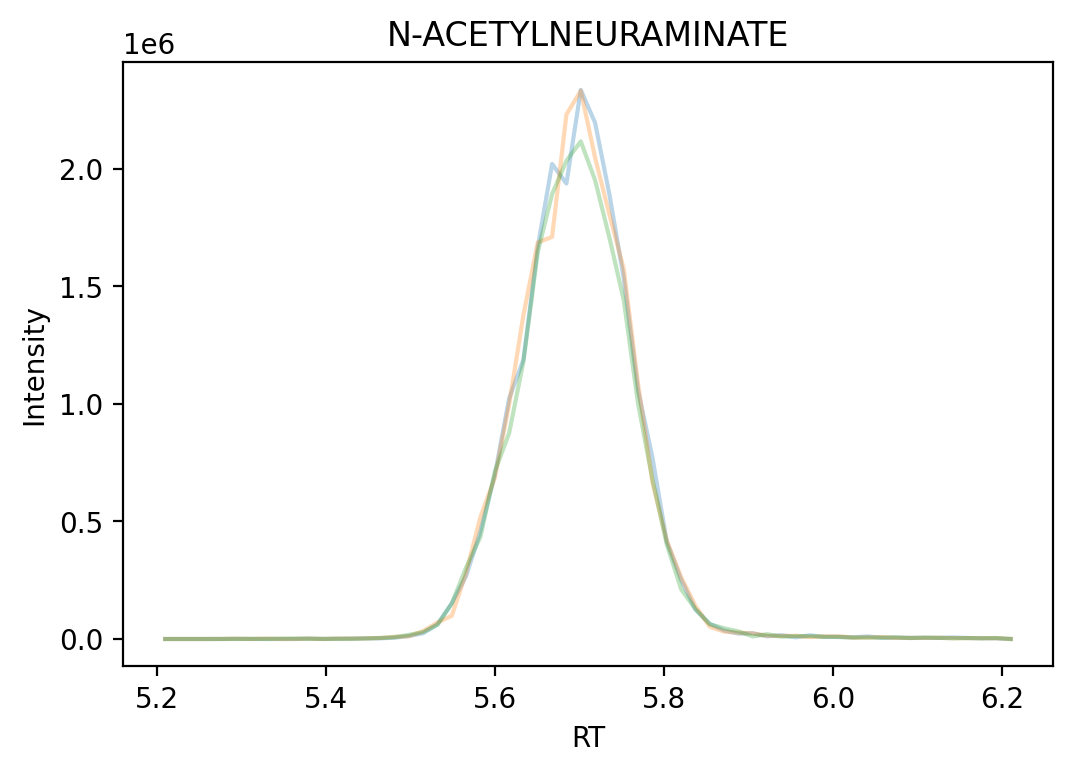

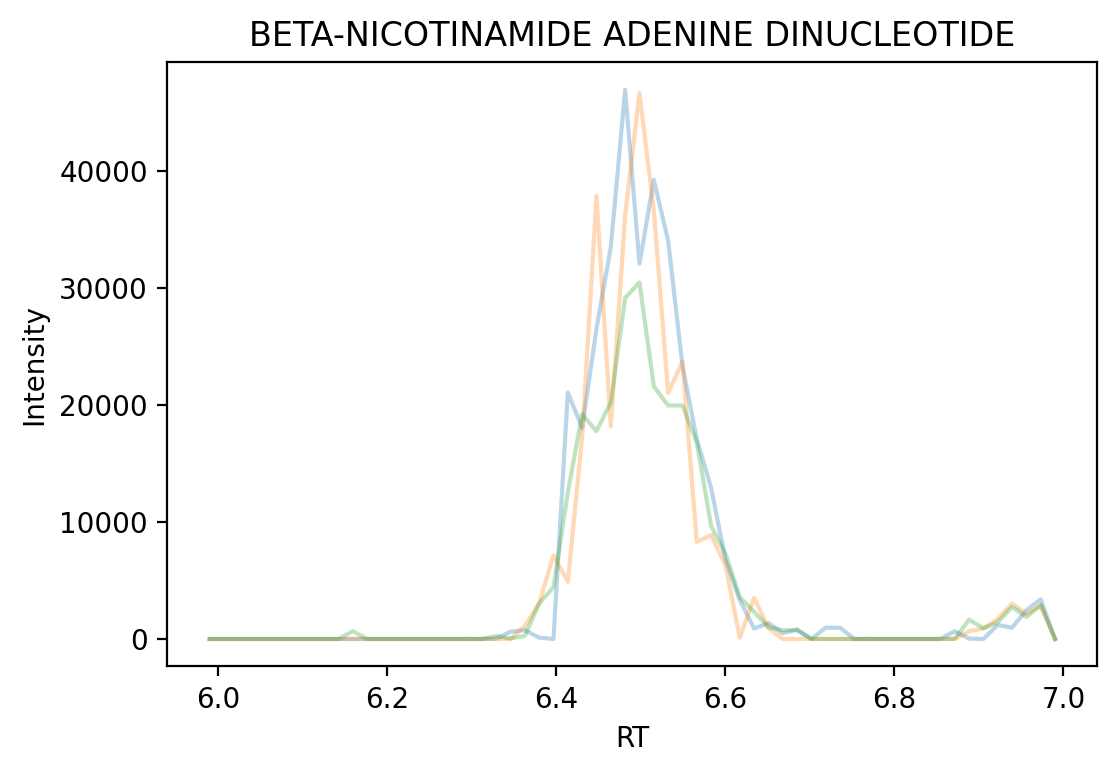

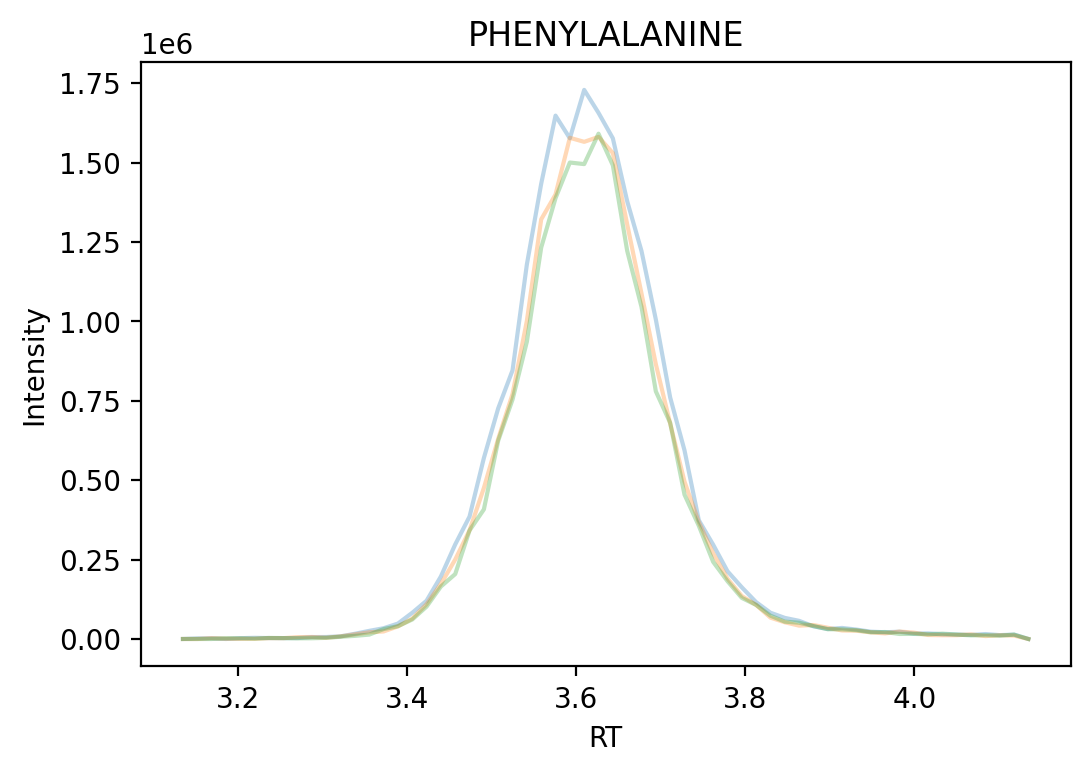

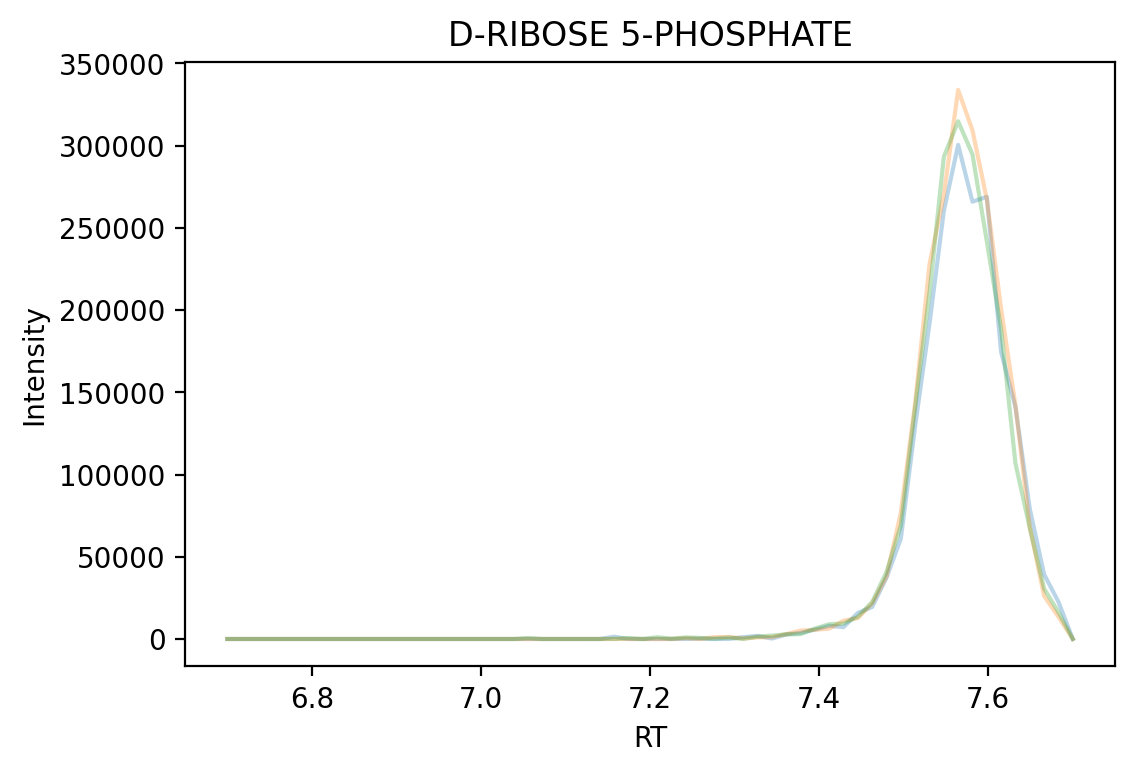

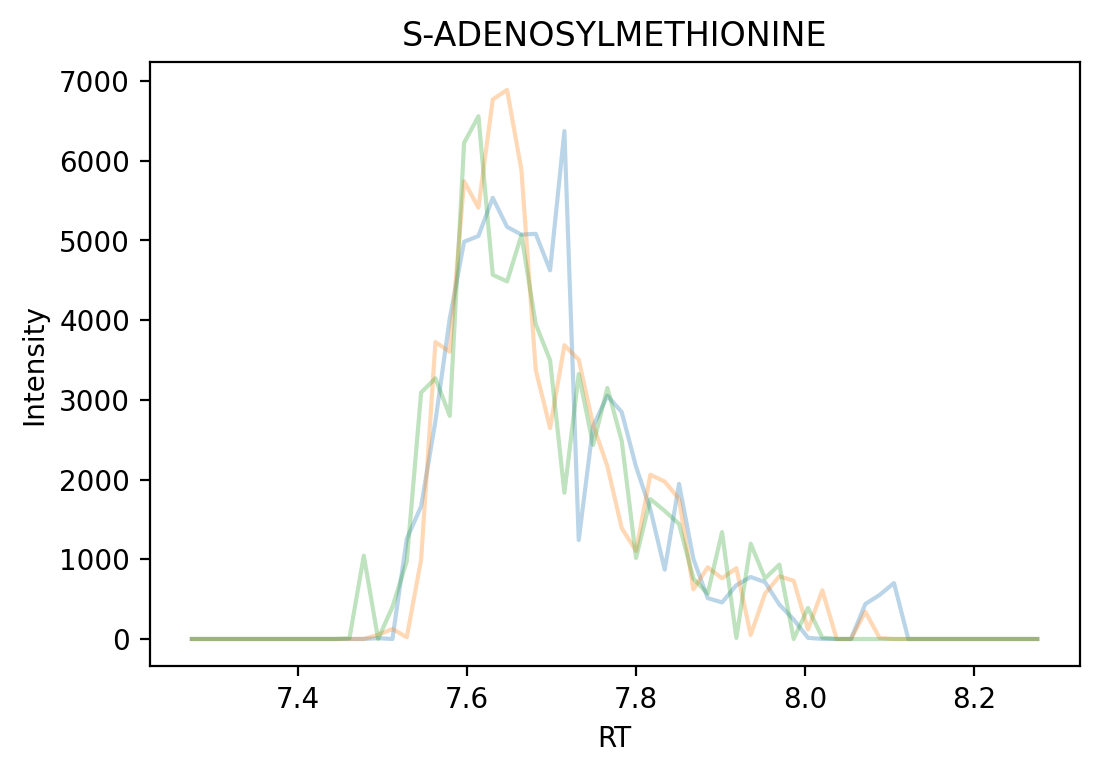

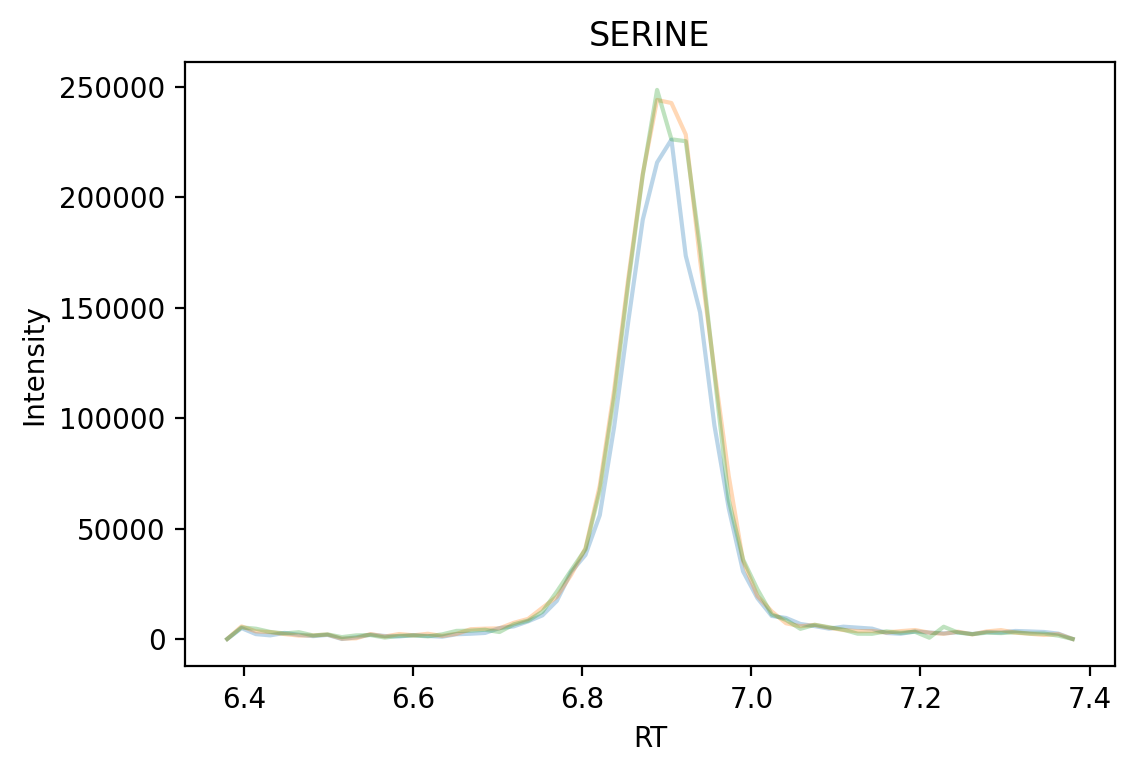

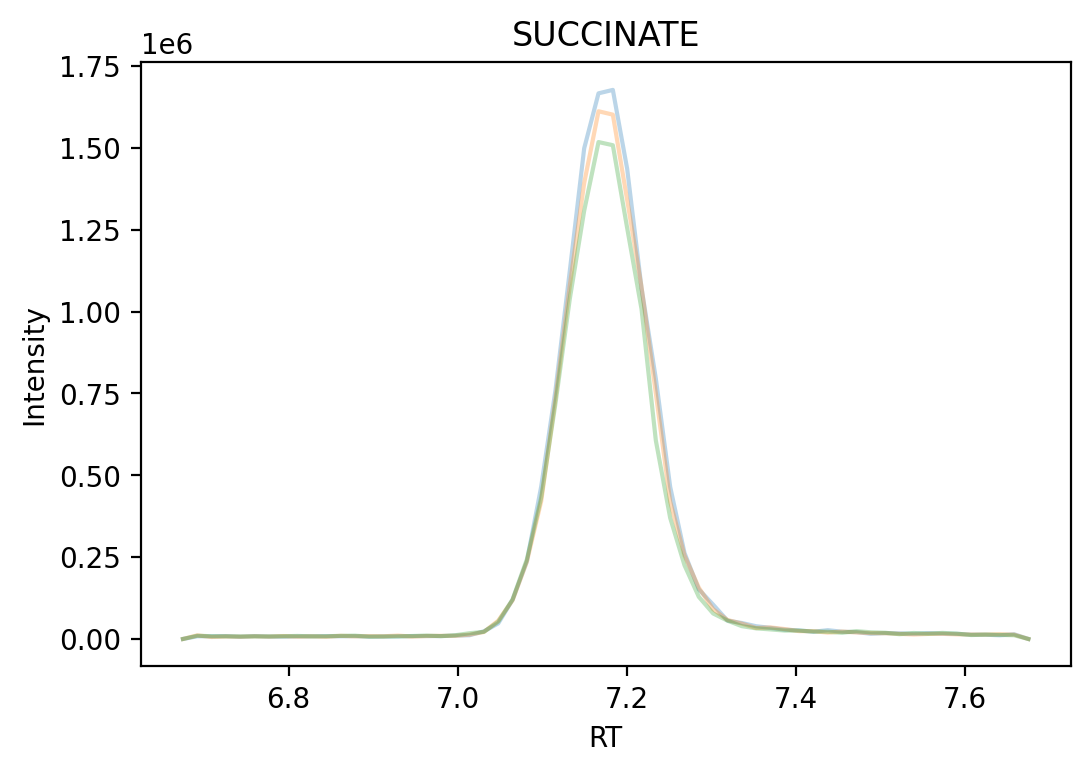

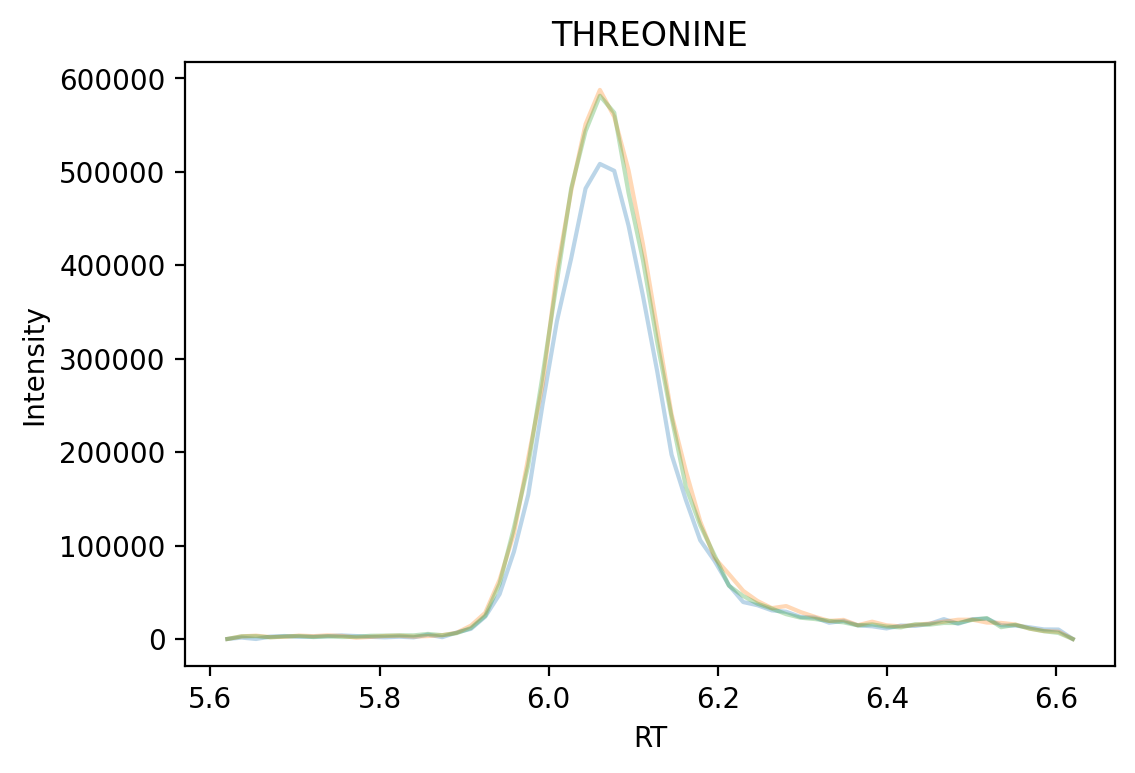

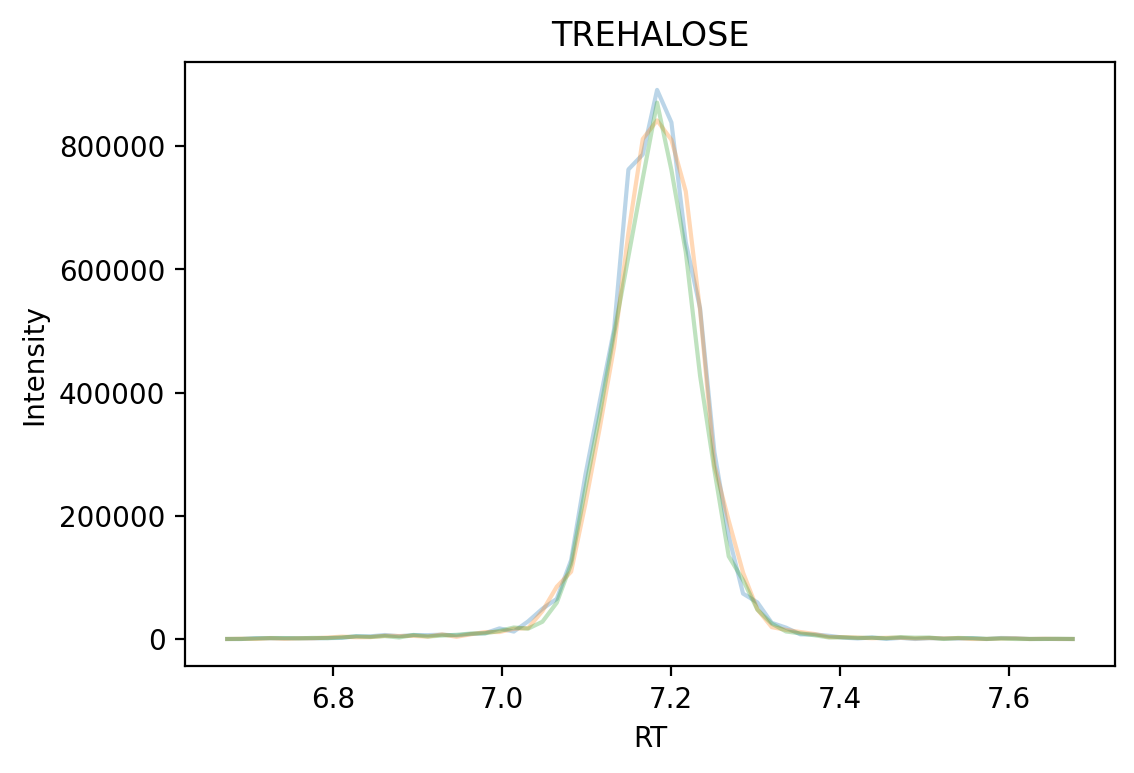

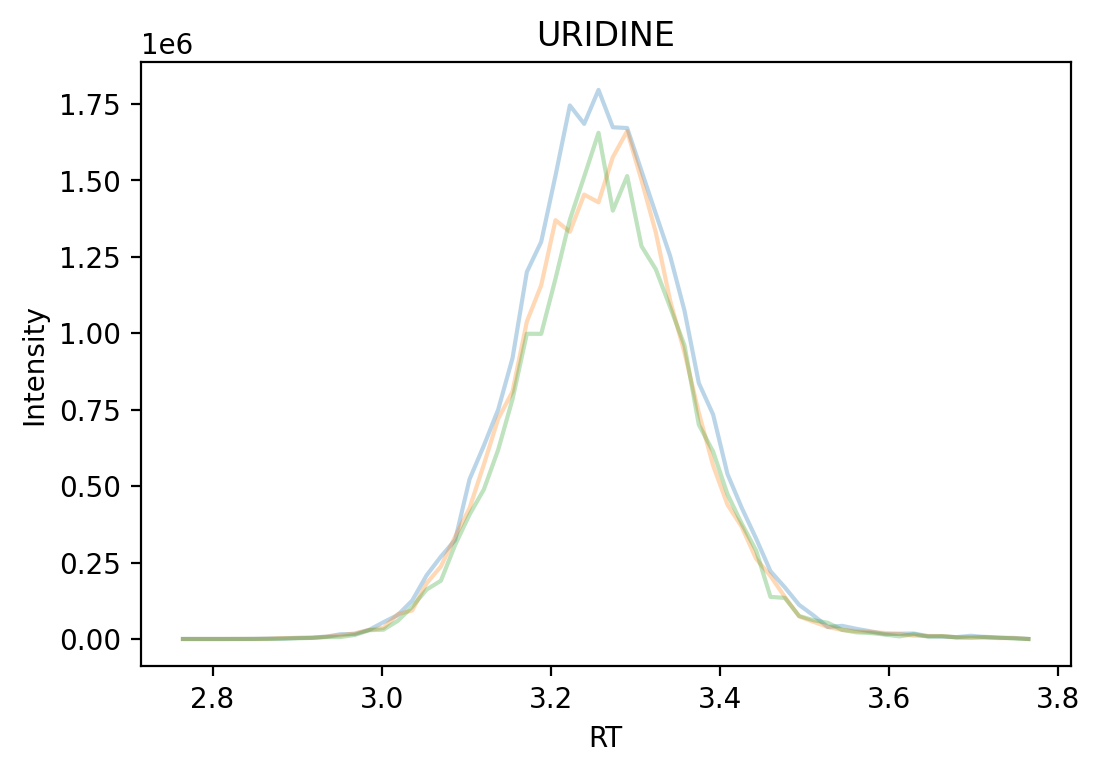

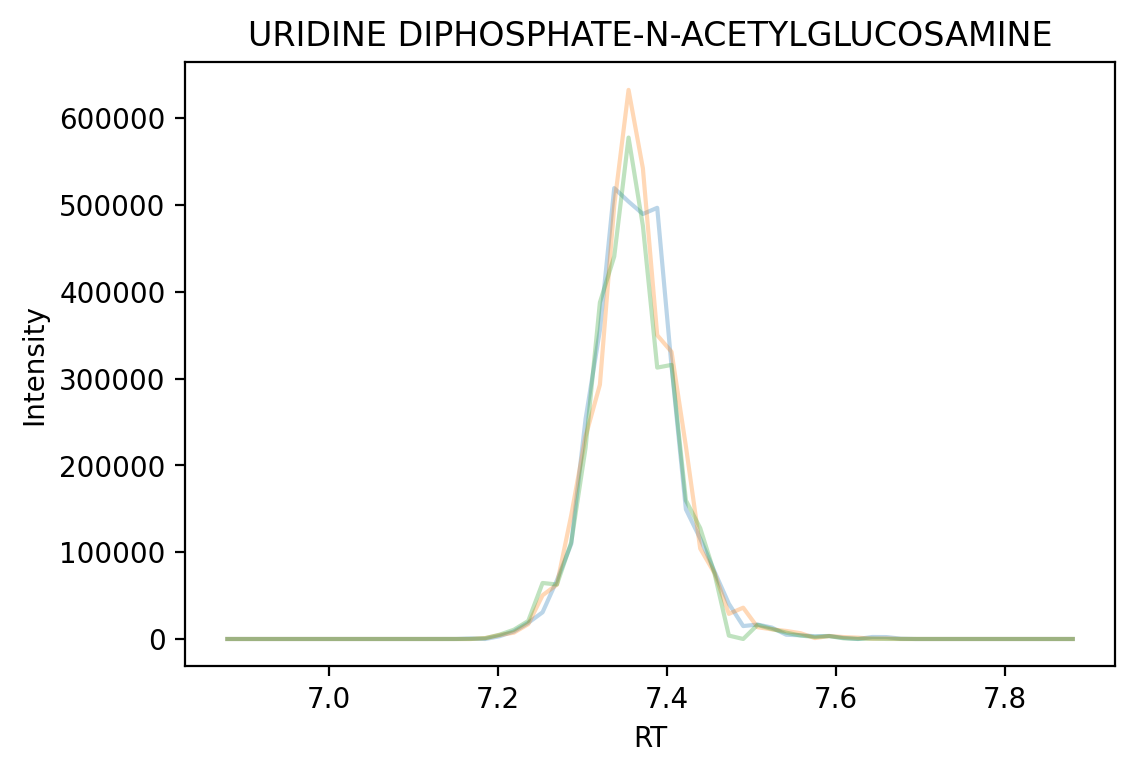

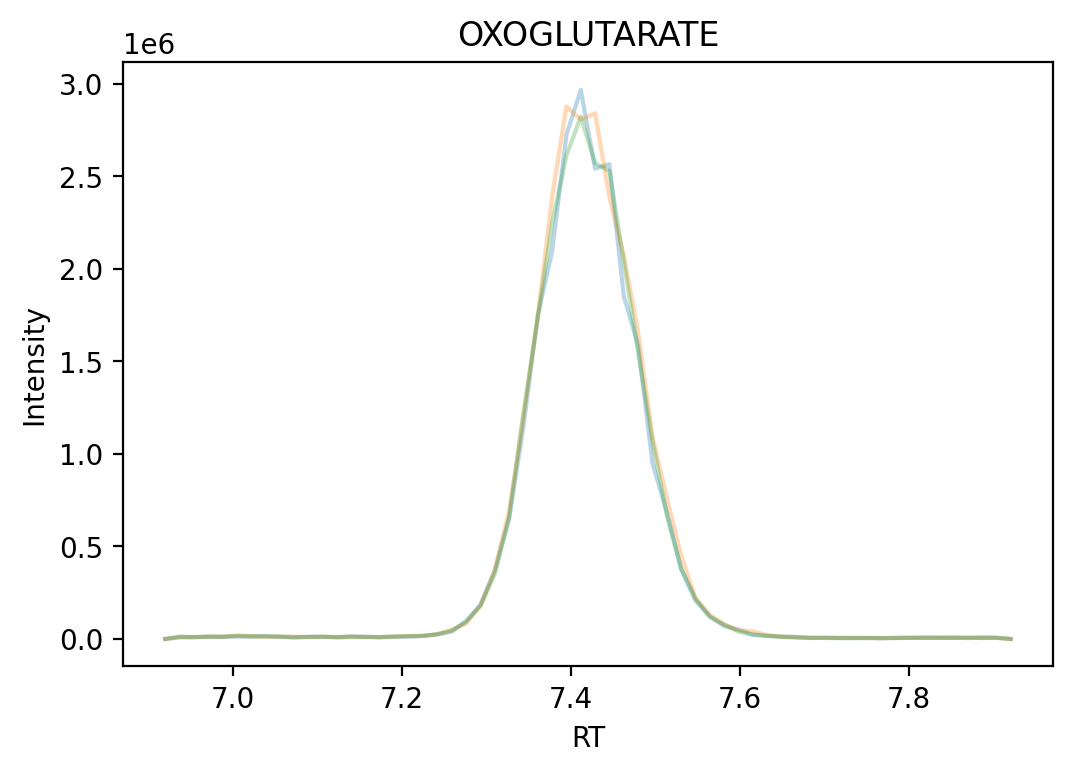

In [30]:
for mz,rt,name in real_peaks:
    if name in corClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC(raw_data,mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

Text(0, 0.5, '% of mixture metabolites ')

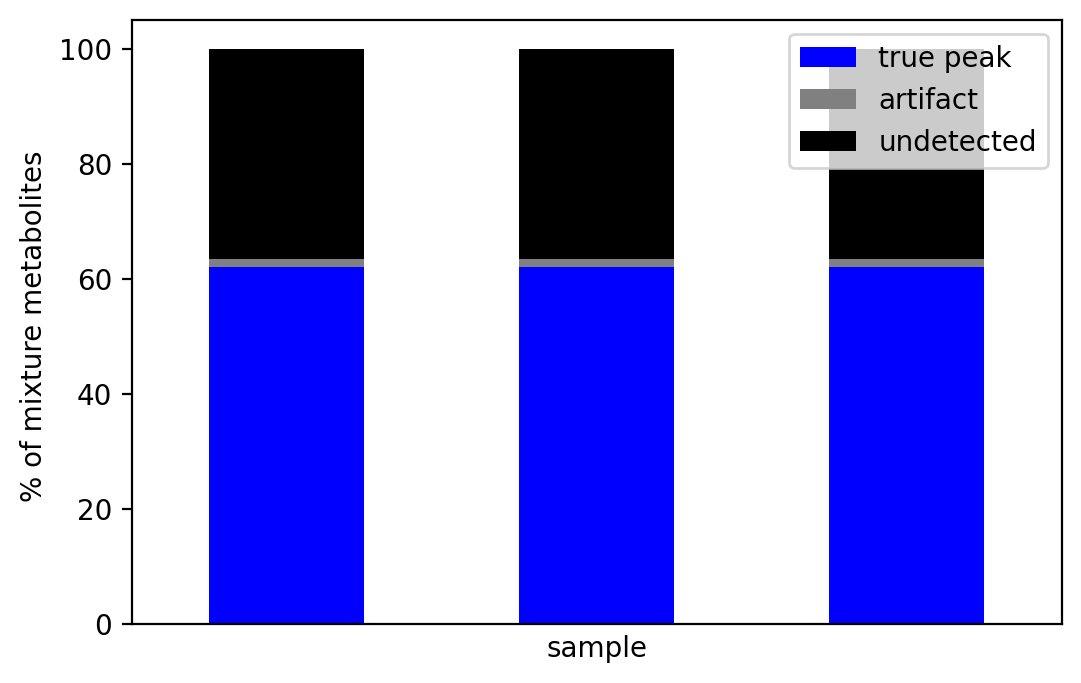

In [31]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["blue","grey","black"])
plt.xticks([],[])
plt.ylabel("% of mixture metabolites ")


Building classification map |█████████████████████████████████████████████████-| 98.3% 

array([[2.29665115e-02, 1.51784234e-02, 2.07777973e-02, ...,
        3.14532742e-02, 3.35927941e-02, 2.21653767e-02],
       [2.03144699e-02, 6.22362550e-03, 1.35585032e-02, ...,
        2.03257371e-02, 4.92953695e-03, 6.36070315e-03],
       [1.12598864e-02, 9.98785812e-03, 2.64687911e-02, ...,
        1.32096633e-02, 1.26950908e-03, 7.05637410e-03],
       ...,
       [1.23721884e-06, 6.70503439e-08, 6.94410174e-09, ...,
        7.51935493e-12, 6.15535400e-12, 7.49098217e-06],
       [1.20871027e-06, 6.36461692e-08, 6.39767439e-09, ...,
        6.33419315e-12, 5.15596463e-12, 7.43311875e-06],
       [1.19883282e-06, 6.20422824e-08, 6.00134520e-09, ...,
        5.37884277e-12, 4.42201484e-12, 7.43186501e-06]])

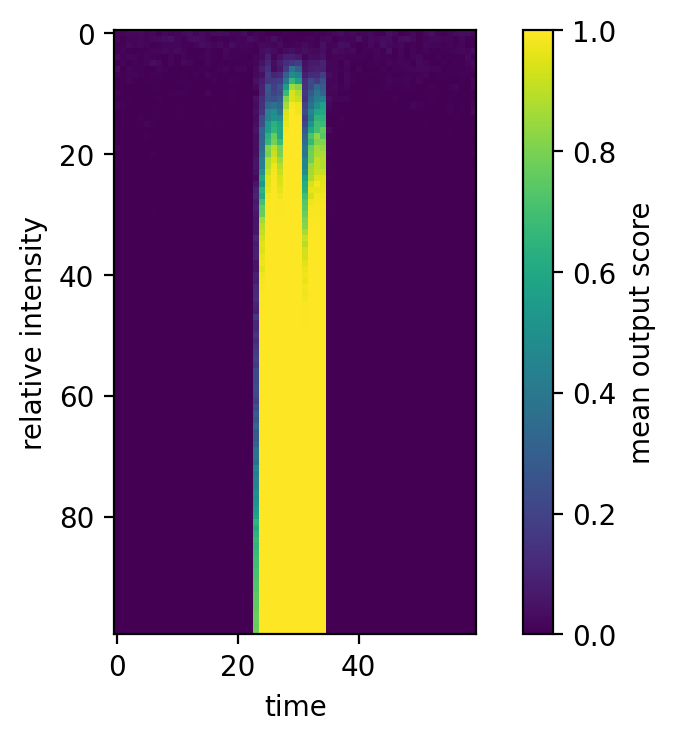

In [28]:
integ.plot_classifier_interpretation()

In [32]:
if __name__ == "__main__":
    ms1_peaks_recurse = {}
    for x in range(len(files)):
        rois = integ.roiDetection(raw_data[x],intensityCutuff=1000,numDataPoints=5)
        peaks = integ.detectPeaks(raw_data[x],rois,window=10,cutoff = 0.5,noiseCutoff=4.0)
        ms1_peaks_recurse[files[x]] = pd.DataFrame(data=np.array(peaks),columns=["mz","rt"])
        

Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3393 ROIs found
3400  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\PeakDetective\__init__.py:495: RuntimeWarning:

divide by zero encountered in log10

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\PeakDetective\__init__.py:495: RuntimeWarning:

invalid value encountered in log10



done,  326400  EICs generated
smoothing EICs...
10200/10200 [==============================] - 62s 6ms/step
done
classifying peaks...
10200/10200 [==============================] - 12s 1ms/step
done
7887  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3235 ROIs found
3240  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  311040  EICs generated
smoothing EICs...
9720/9720 [==============================] - 52s 5ms/step
done
classifying peaks...
9720/9720 [==============================] - 11s 1ms/step
done
7582  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3217 ROIs found
3225  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  309600  EICs generated
smoothing EICs...
9675/9675 [==============================] - 50s 5ms/step
done
classifying peaks...
9675/9

In [33]:
plt_dict = {}
ppmTol = 10
rtTol = .5
for file in files: 
    for mz,rt,name in real_peaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        for index,row in ms1_peaks_recurse[file].iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-row["rt"]) < rtTol:
                    numDetected += 1
                    found = True
                    plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"true peak","sample" : file}
                    break
        if not found:
            plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"undetected","sample" : file}
   
df = pd.DataFrame.from_dict(plt_dict,orient="index")

Text(0, 0.5, '% of mixture metabolites ')

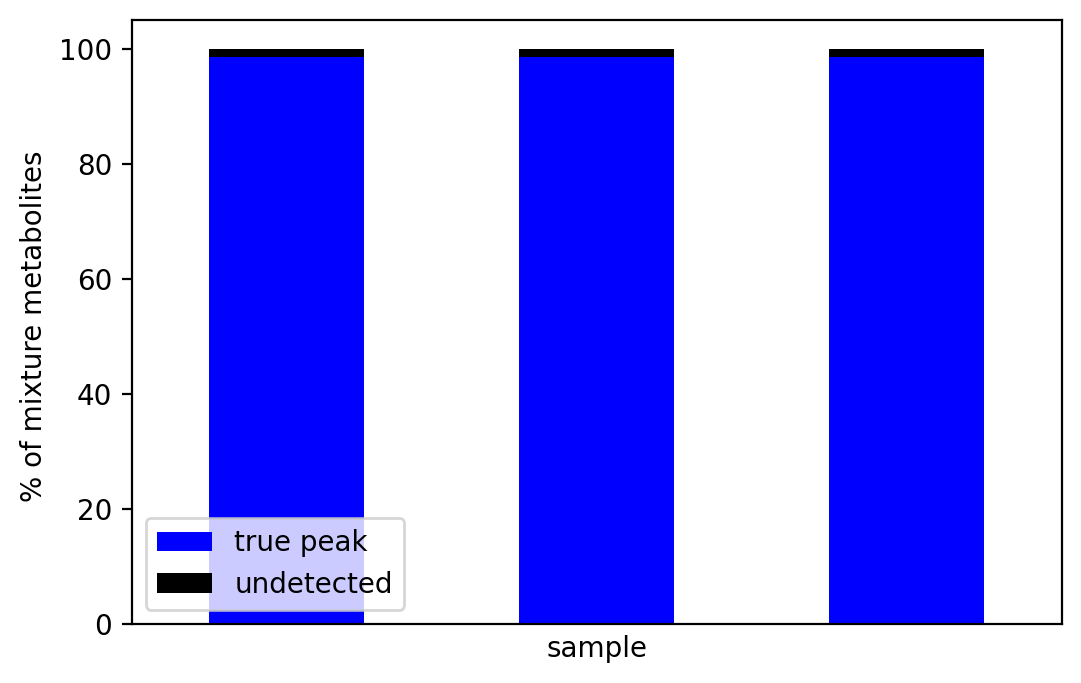

In [34]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["blue","black"])
plt.xticks([],[])
plt.ylabel("% of mixture metabolites ")


In [35]:
ms1_peaks_recurse[file]

mz        rt
0      68.996035  0.672274
1      68.996035  0.838940
2      71.014143  1.005607
3      71.014143  1.838940
4      71.014143  4.172274
...          ...       ...
7590  885.119860  8.338940
7591  886.217280  5.672274
7592  889.810530  8.672274
7593  889.810530  8.838940
7594  890.793168  8.838940

[7595 rows x 2 columns]

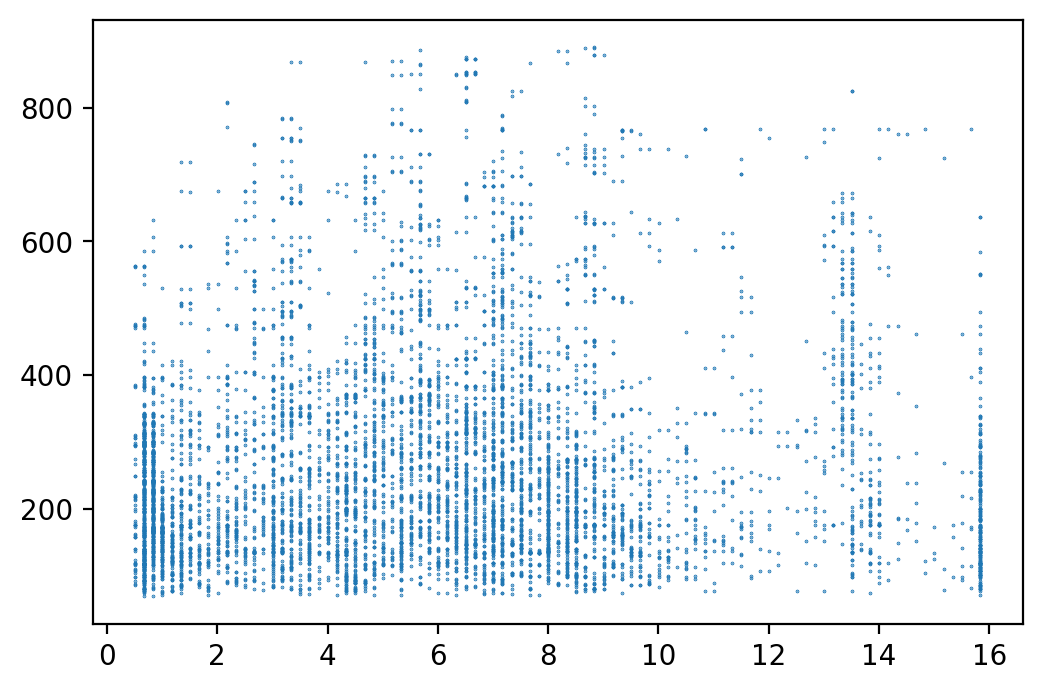

In [36]:
plt.scatter(ms1_peaks_recurse[file]["rt"],ms1_peaks_recurse[file]["mz"],s=.1)

In [37]:
transitionList = pd.DataFrame(ms1_peaks_recurse[file])
polarity = "Negative"
moleculeListName = file + " peaks"
transitionList["Precursor Name"] = ["unknown " + str(index) for index, row in transitionList.iterrows()]
transitionList["Explicit Retention Time"] = [row["rt"] for index, row in
                                             transitionList.iterrows()]
polMapper = {"Positive": 1, "Negative": -1}
transitionList["Precursor Charge"] = [polMapper[polarity] for index, row in transitionList.iterrows()]
transitionList["Precursor m/z"] = [row["mz"] for index,row in transitionList.iterrows()]
transitionList["Molecule List Name"] = [moleculeListName for _ in range(len(transitionList))]
transitionList = transitionList[
    ["Molecule List Name", "Precursor Name", "Precursor m/z", "Precursor Charge",
     "Explicit Retention Time"]]
transitionList.to_csv(datadir + "recursive_peaks_transition_list.csv",index= False)

In [38]:
df[df["classification"] == "undetected"]

metabolite classification                    sample
39   HISTIDINE     undetected  M3T-Std_neg_DDA_1mz.mzML
110  HISTIDINE     undetected  M3T-Std_neg_DDA_3mz.mzML
181  HISTIDINE     undetected  M3T-Std_neg_DDA_5mz.mzML